## Linear Regression Assignment
## Geely Auto Pricing Model

#### By Vaibhav Kumar

#### Problem Statement 
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
Which variables are significant in predicting the price of a car
How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market

#### Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.
<br>**So interpretation is important!**
<br>Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [374]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [375]:
# Importing Libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing packages for linear regression

In [376]:
# module for performing test train split
from sklearn.model_selection import train_test_split
# Module for feture scaling
from sklearn.preprocessing import MinMaxScaler
# statmodel linear regression
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Reading Data

In [377]:
df = pd.read_csv('CarPrice_Assignment.csv')
# Check the head of the dataset
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [378]:
df.shape

(205, 26)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [380]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

###### Checking data for missing values and droping the duplicates

In [381]:
# percentage of missing values in each column
round(df.isnull().sum()/len(df.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [382]:
# Dropping Duplicates
df=df.drop_duplicates()

In [383]:
#we can drop the car_ID variable which is not relevent for the price modeling
df.drop('car_ID',axis=1,inplace=True)

# Data Analysis

<AxesSubplot:xlabel='price', ylabel='Density'>

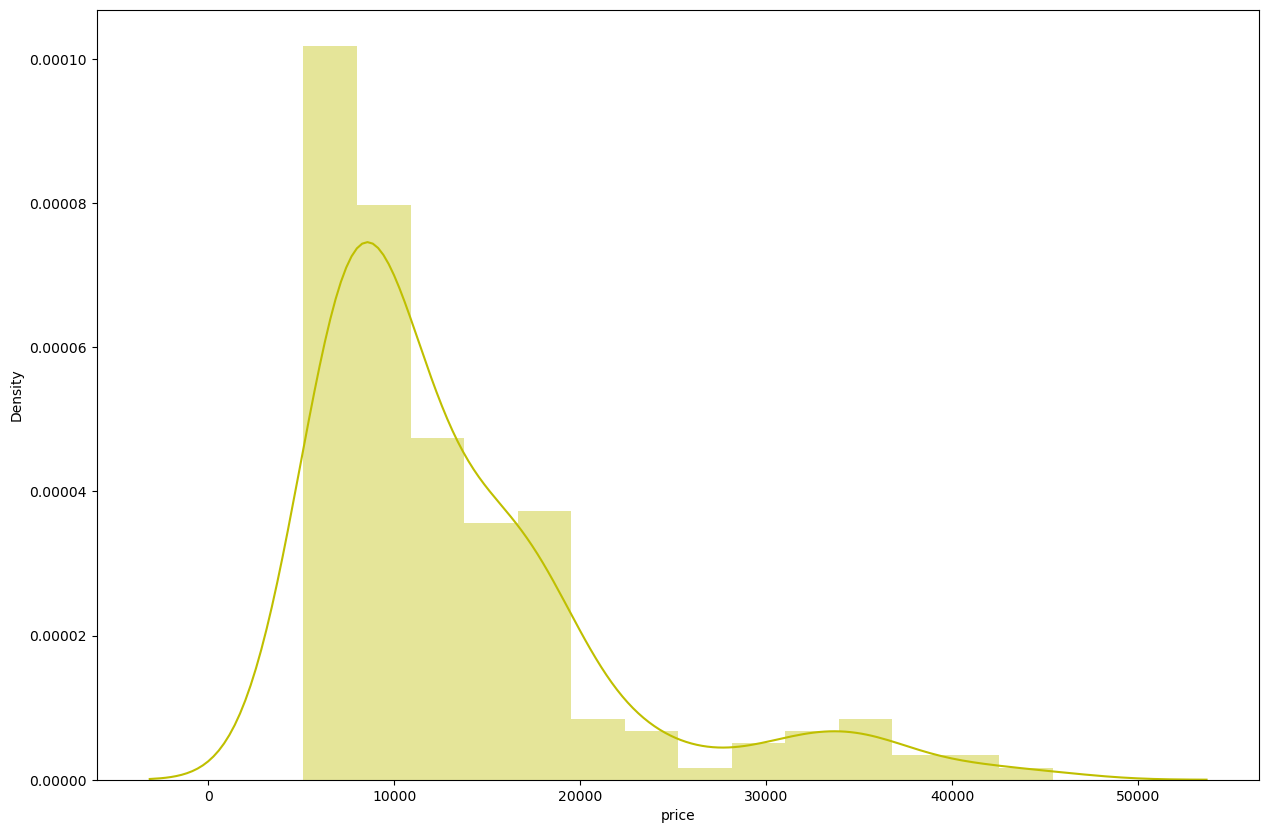

In [384]:
# Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.distplot(df['price'],color="y")

<AxesSubplot:xlabel='price', ylabel='Density'>

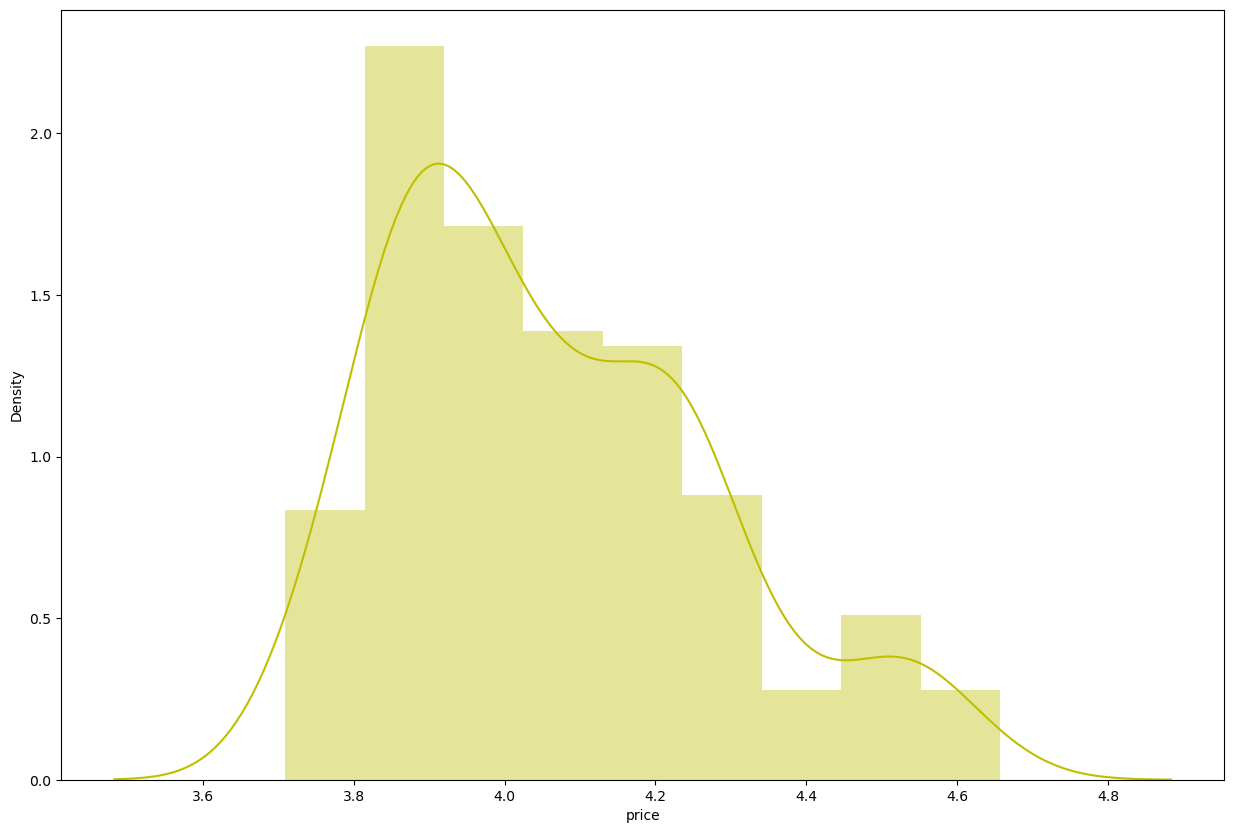

In [385]:
# Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.distplot(np.log10(df['price']),color="y")

In [386]:
numeric_features = df.describe().columns

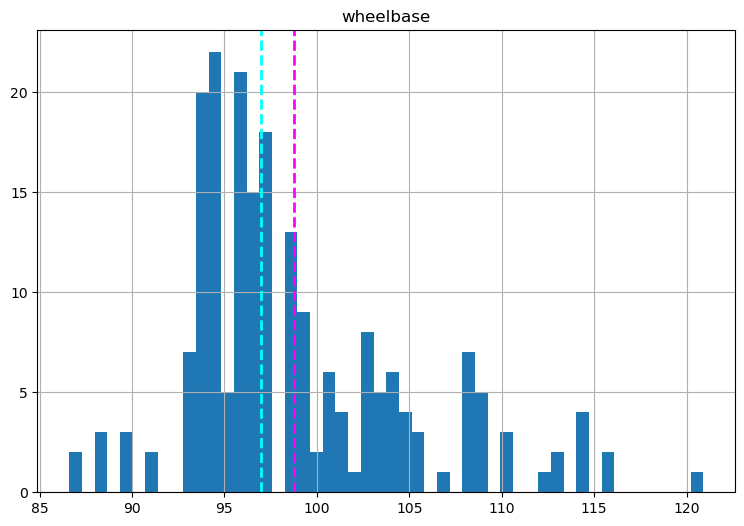

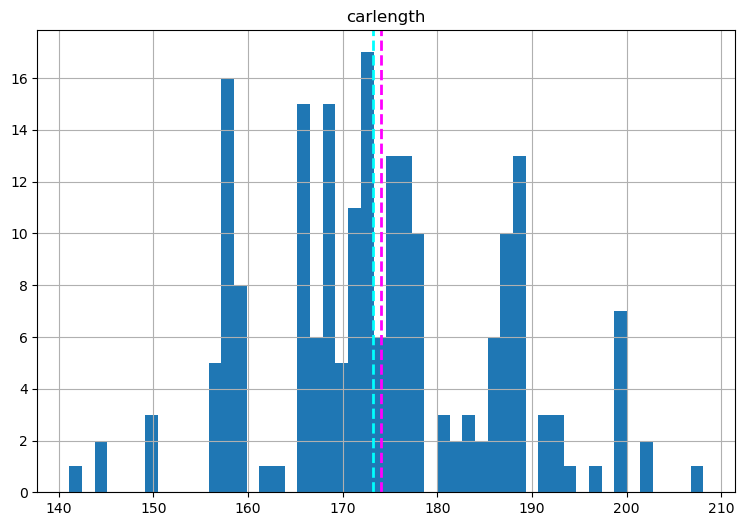

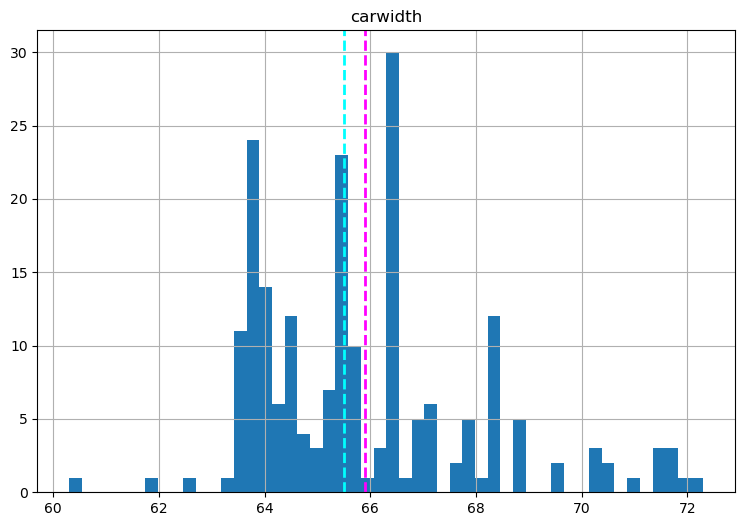

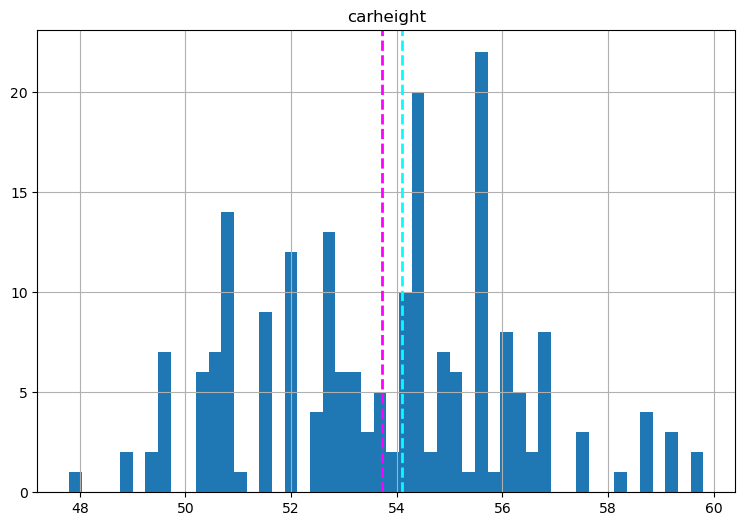

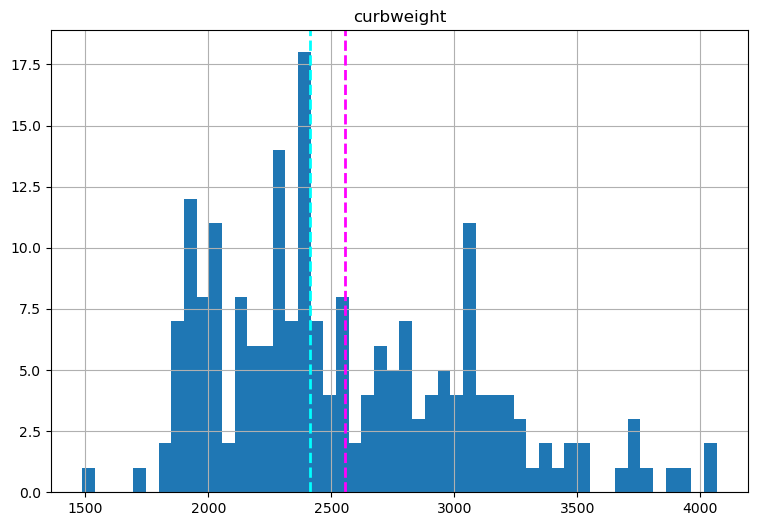

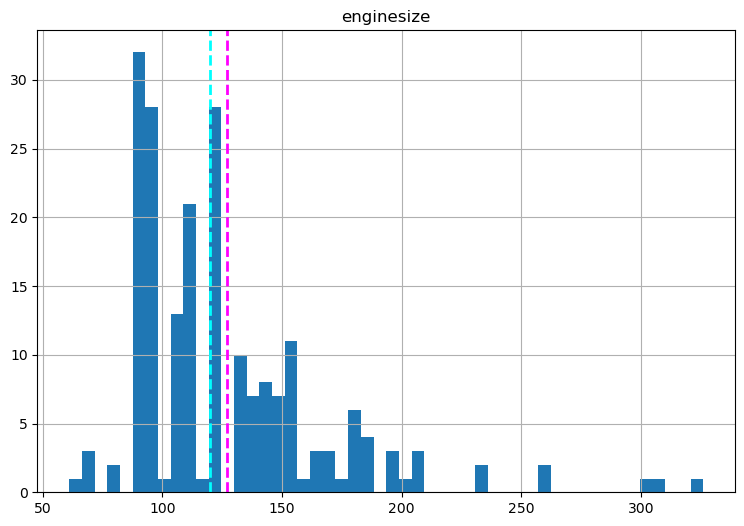

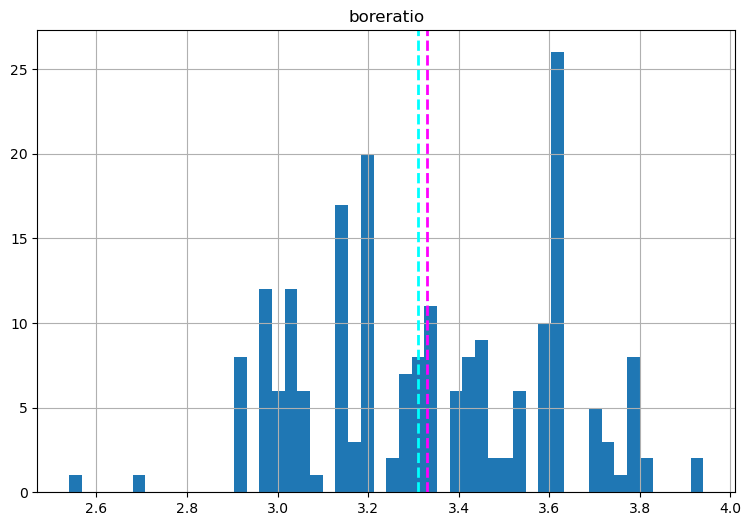

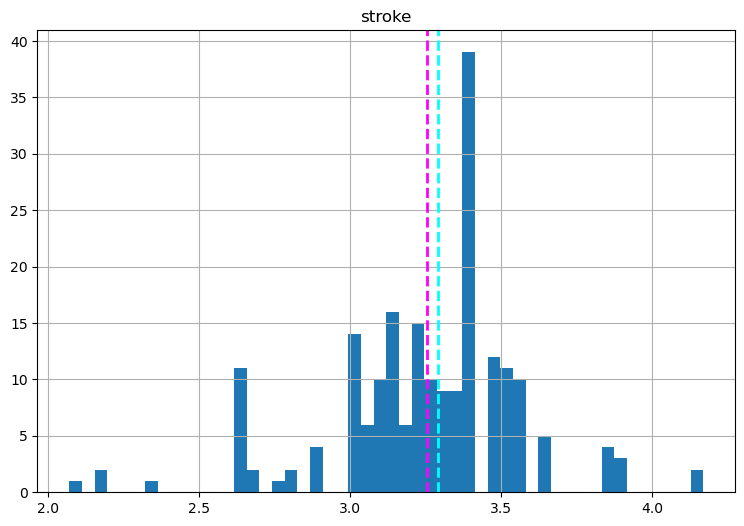

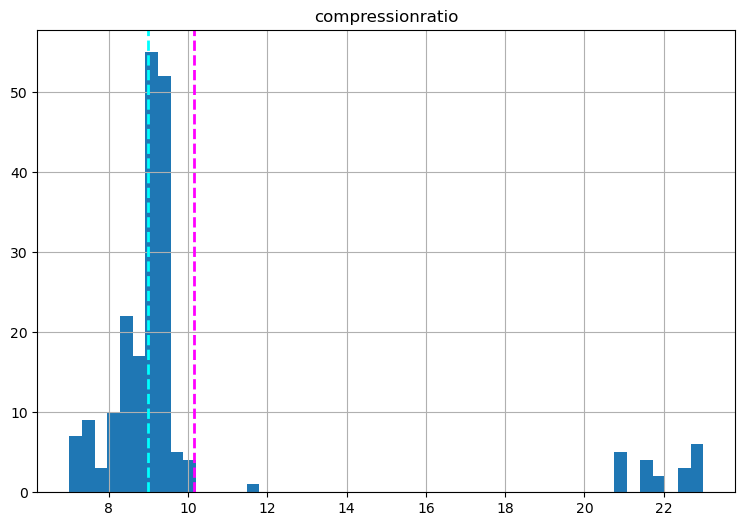

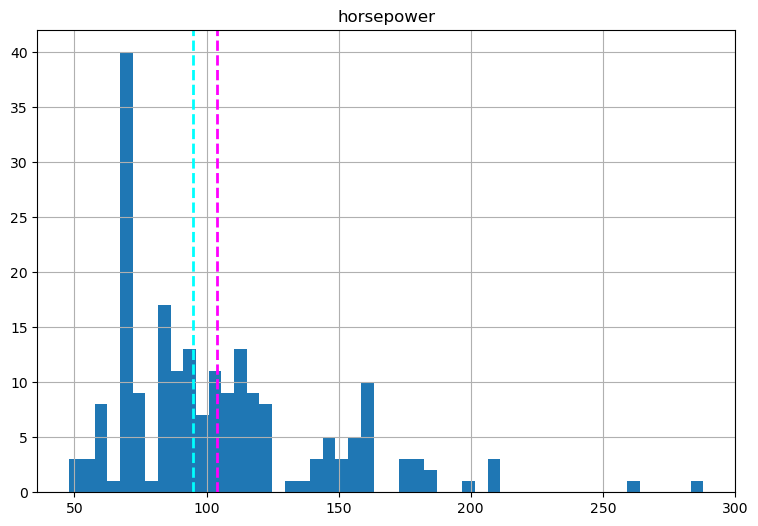

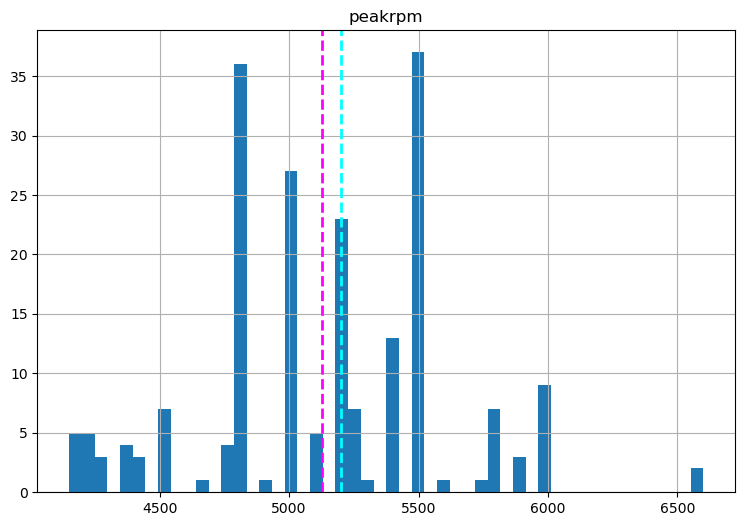

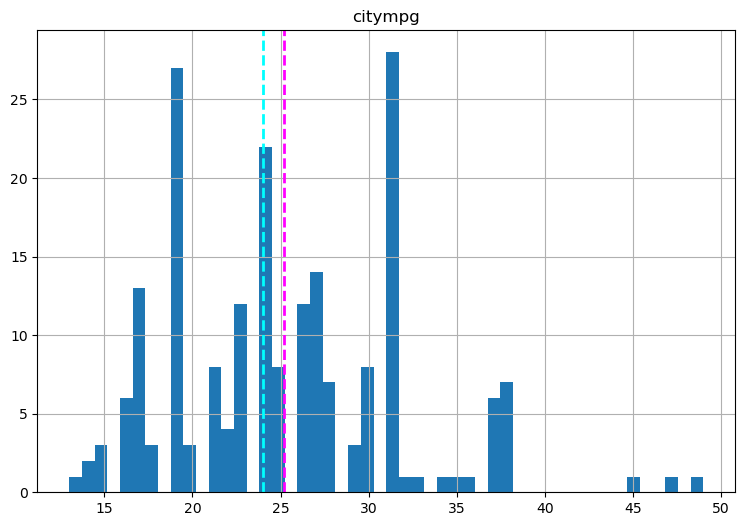

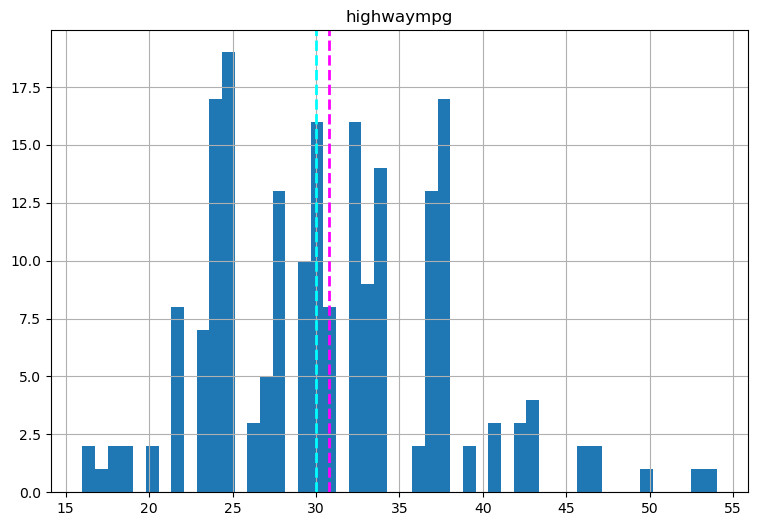

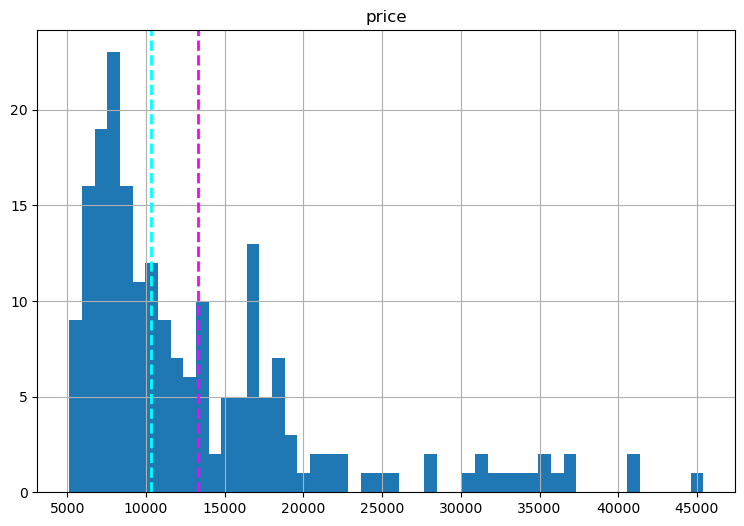

In [387]:
#@title Default title text
# plot a bar plot for each categorical feature count (except car_ID)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

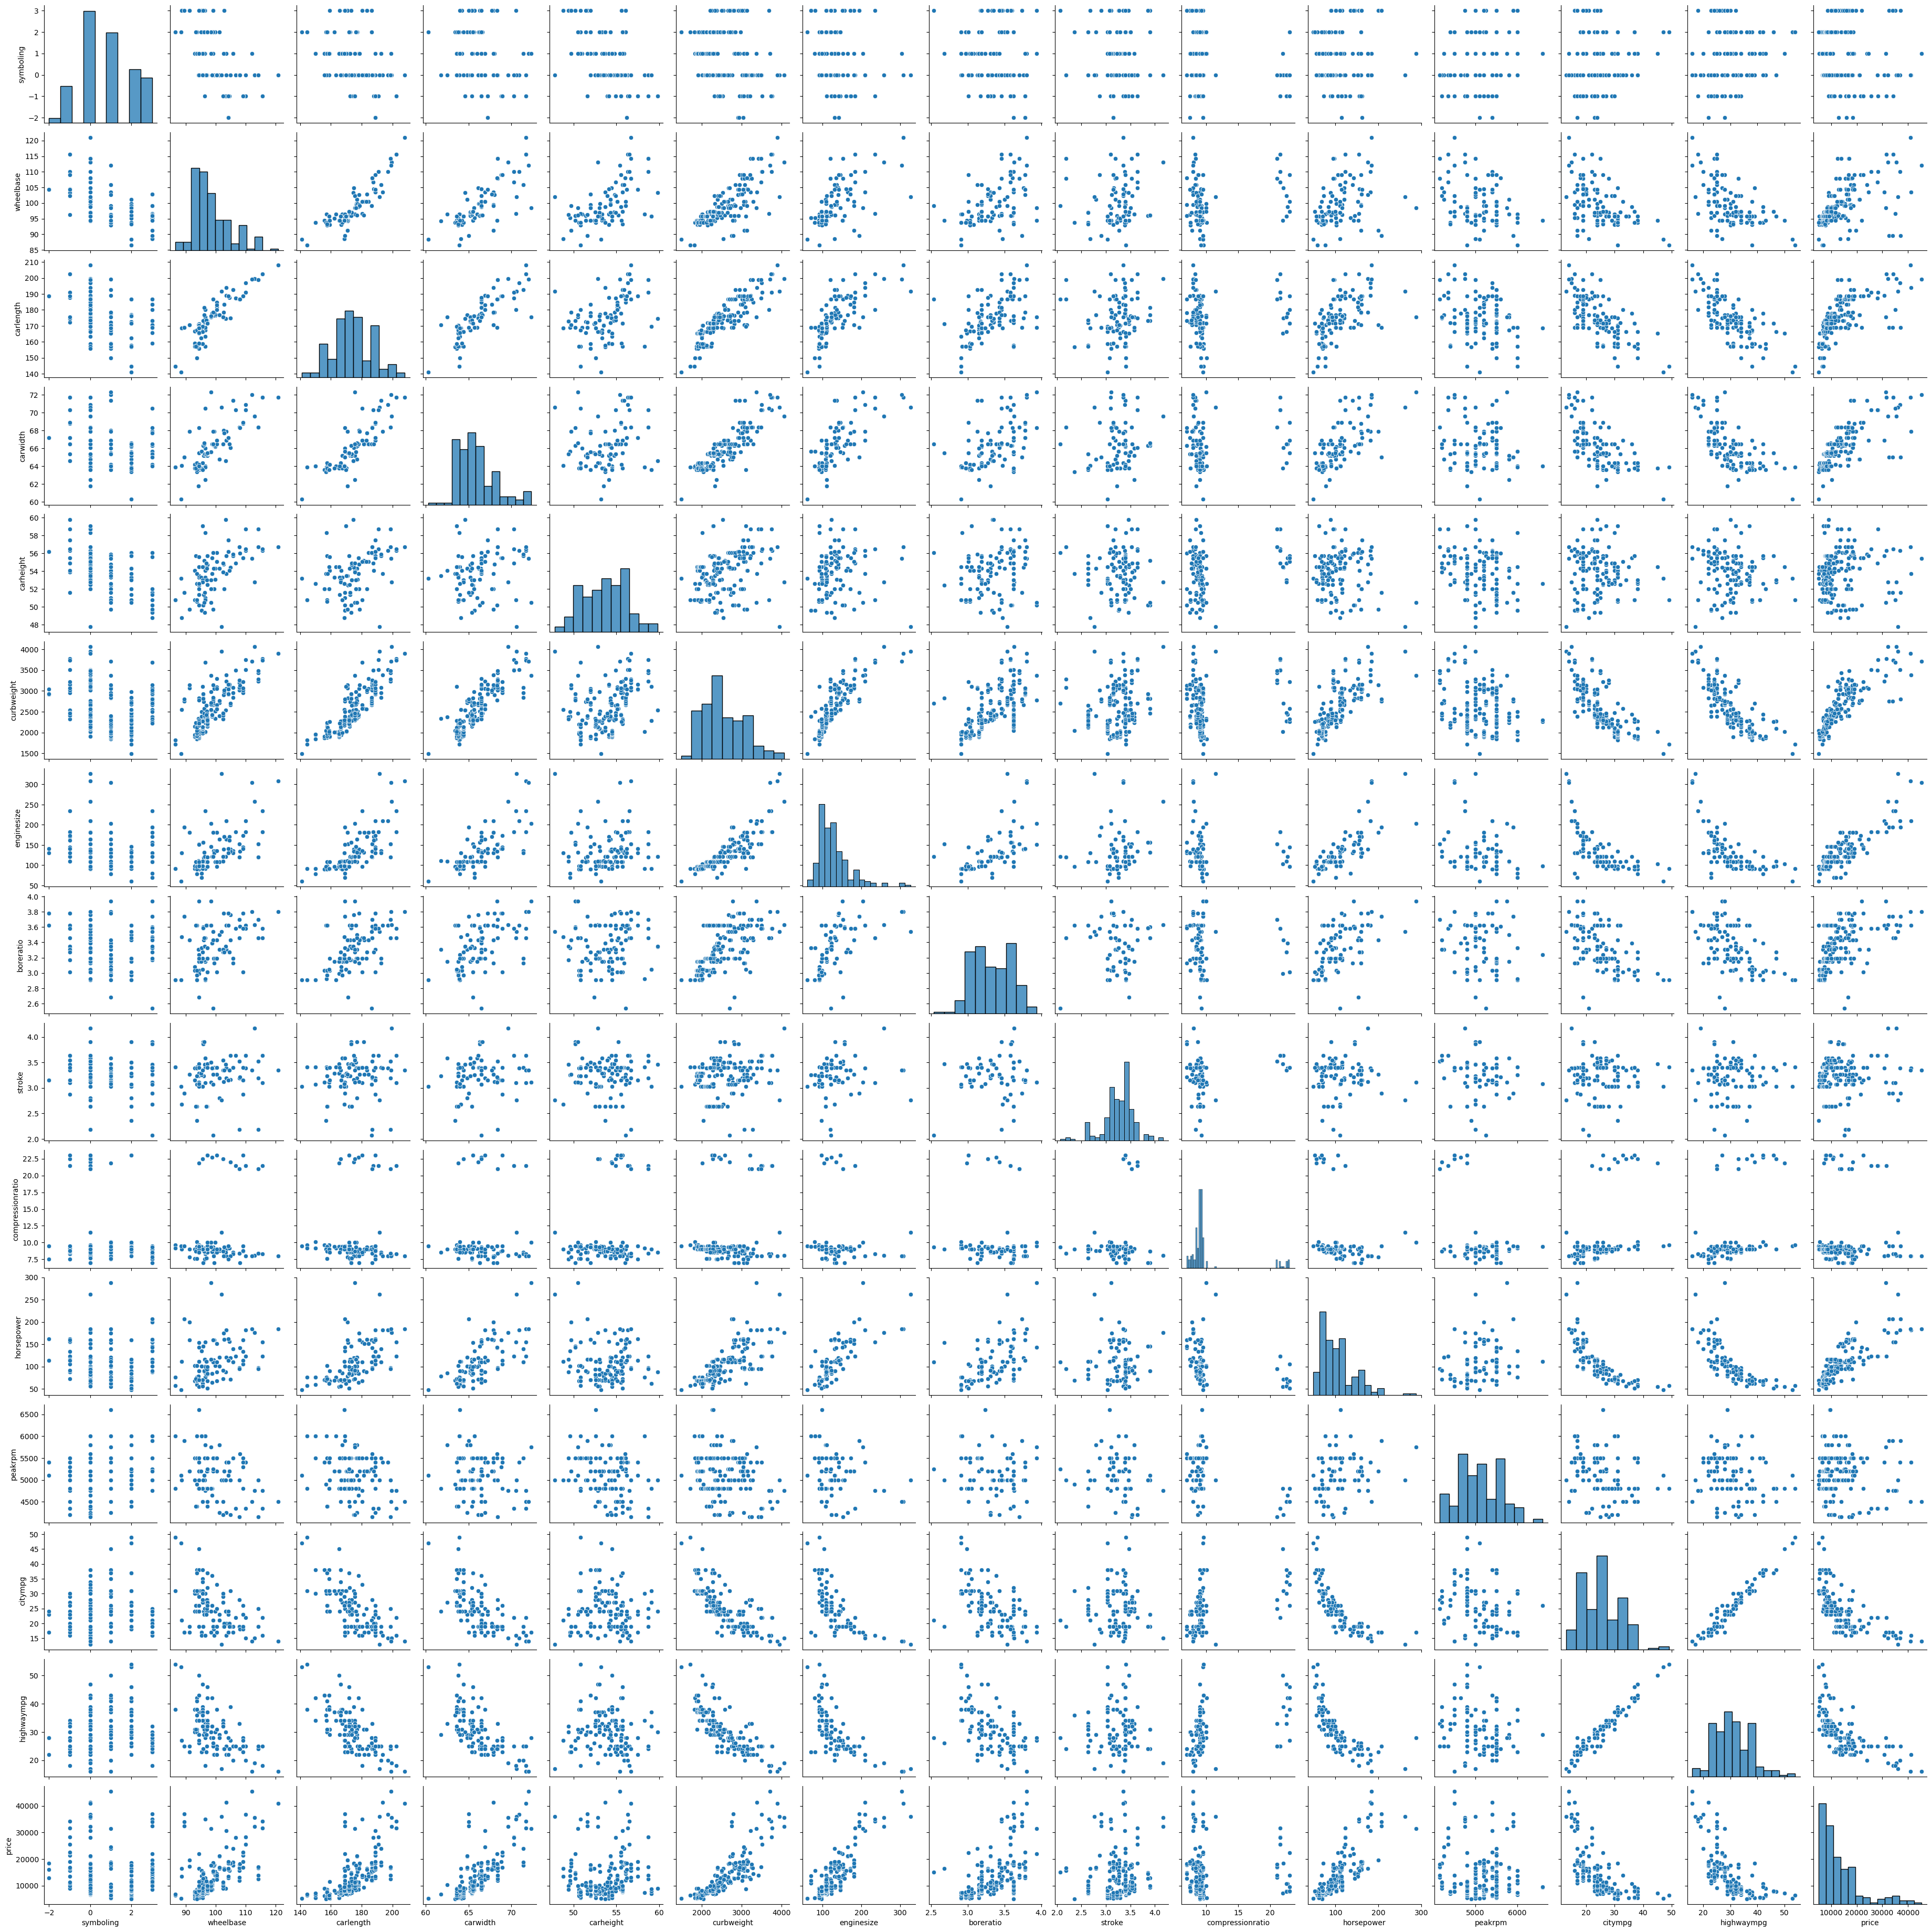

In [358]:
sns.pairplot(df)
plt.show()

#
correlation is a value ranging between -1 to +1

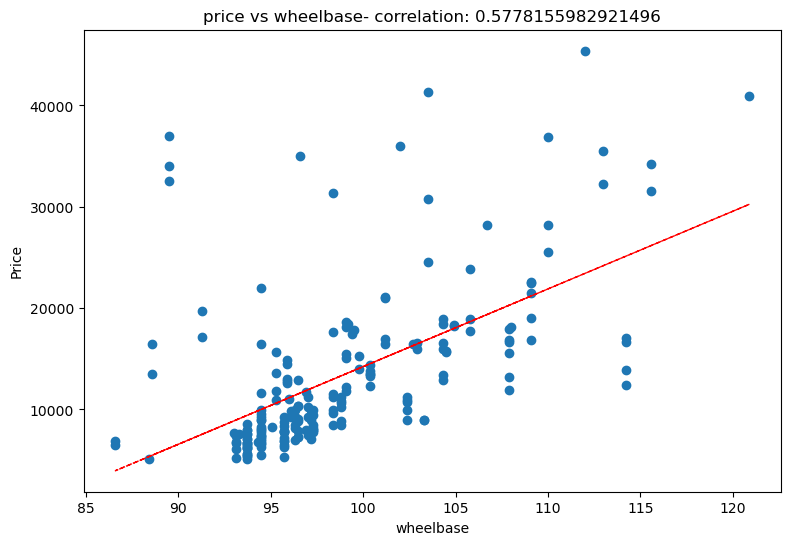

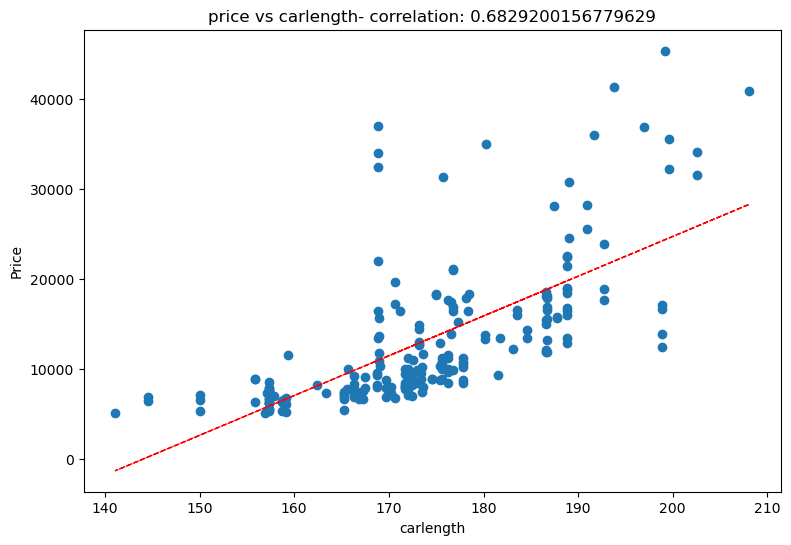

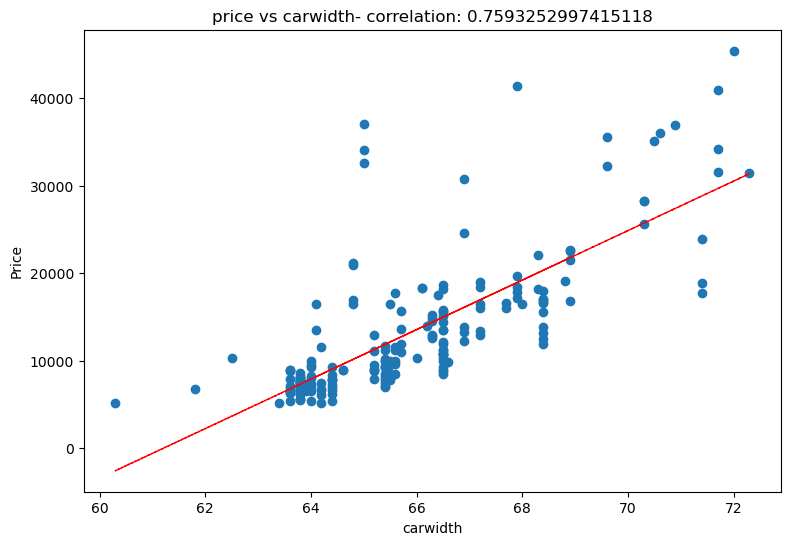

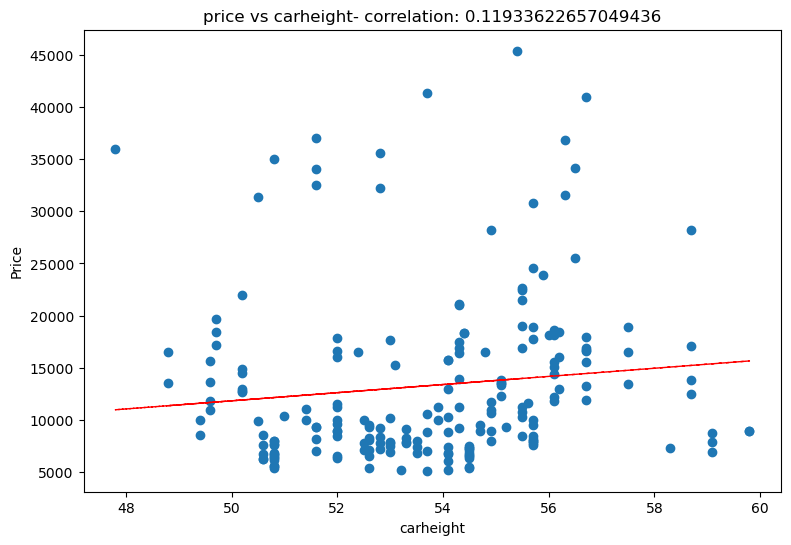

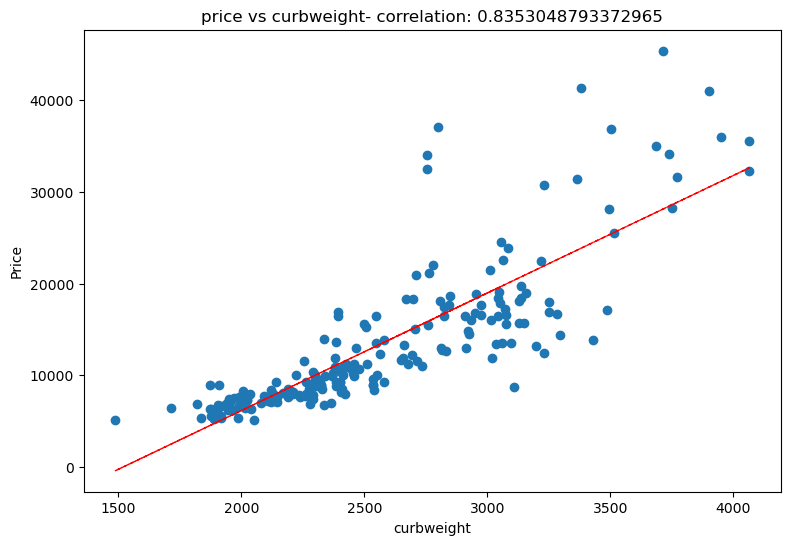

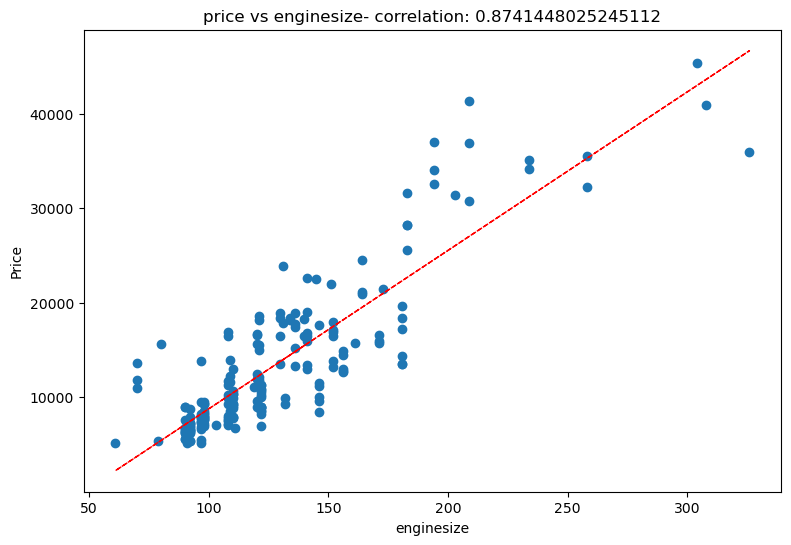

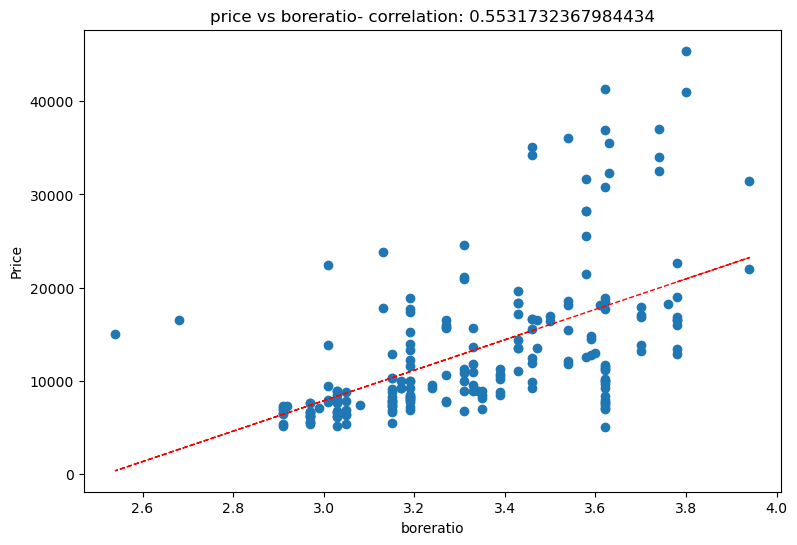

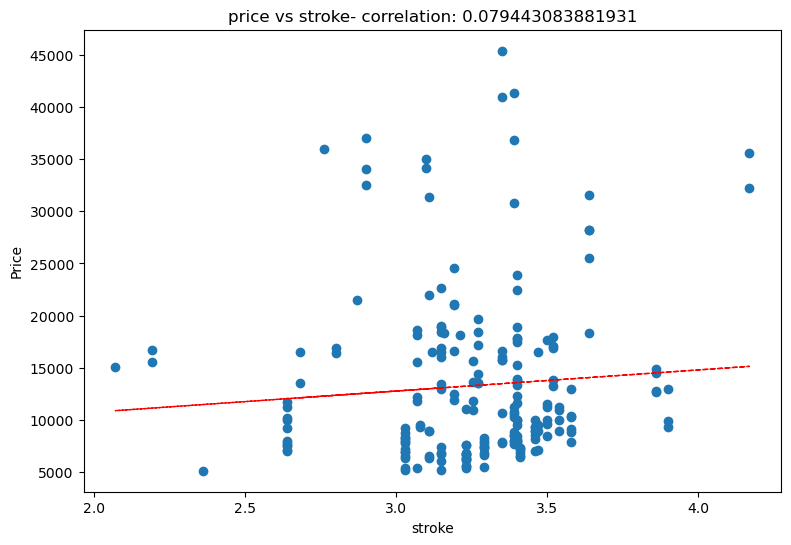

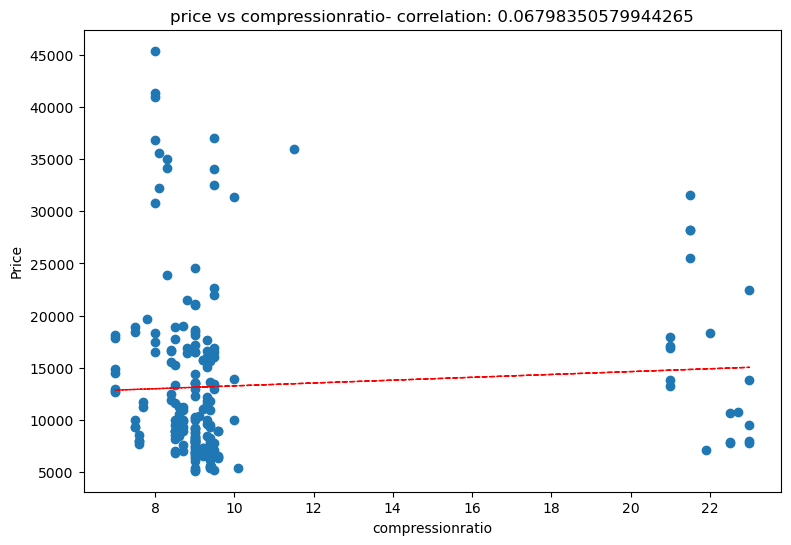

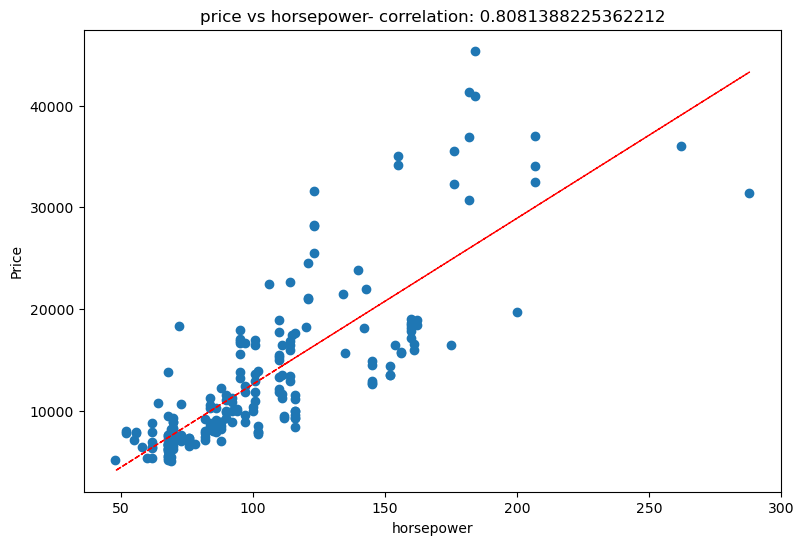

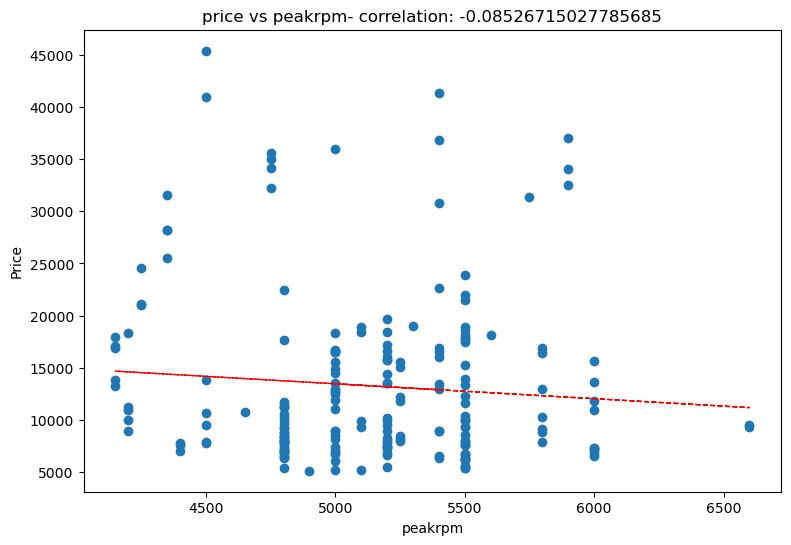

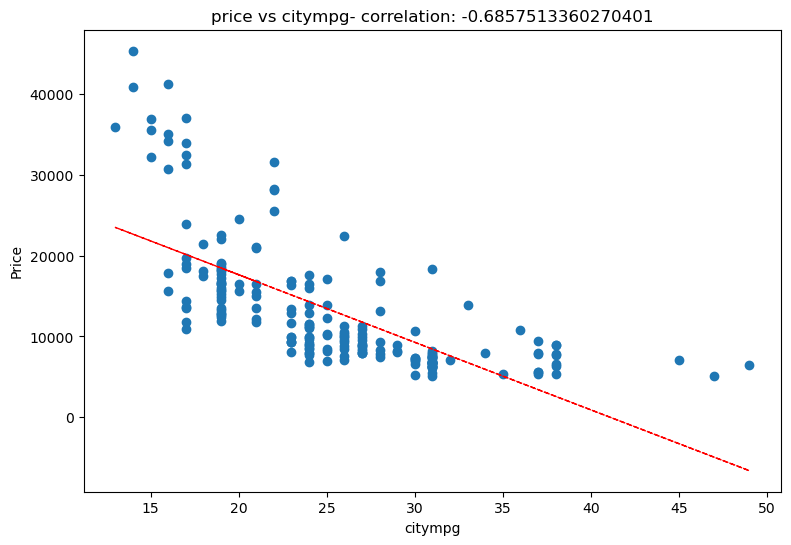

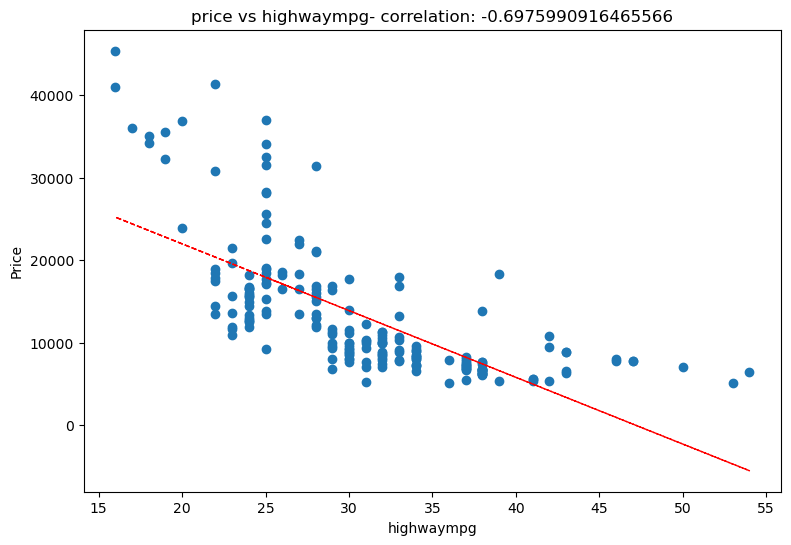

In [388]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['price'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

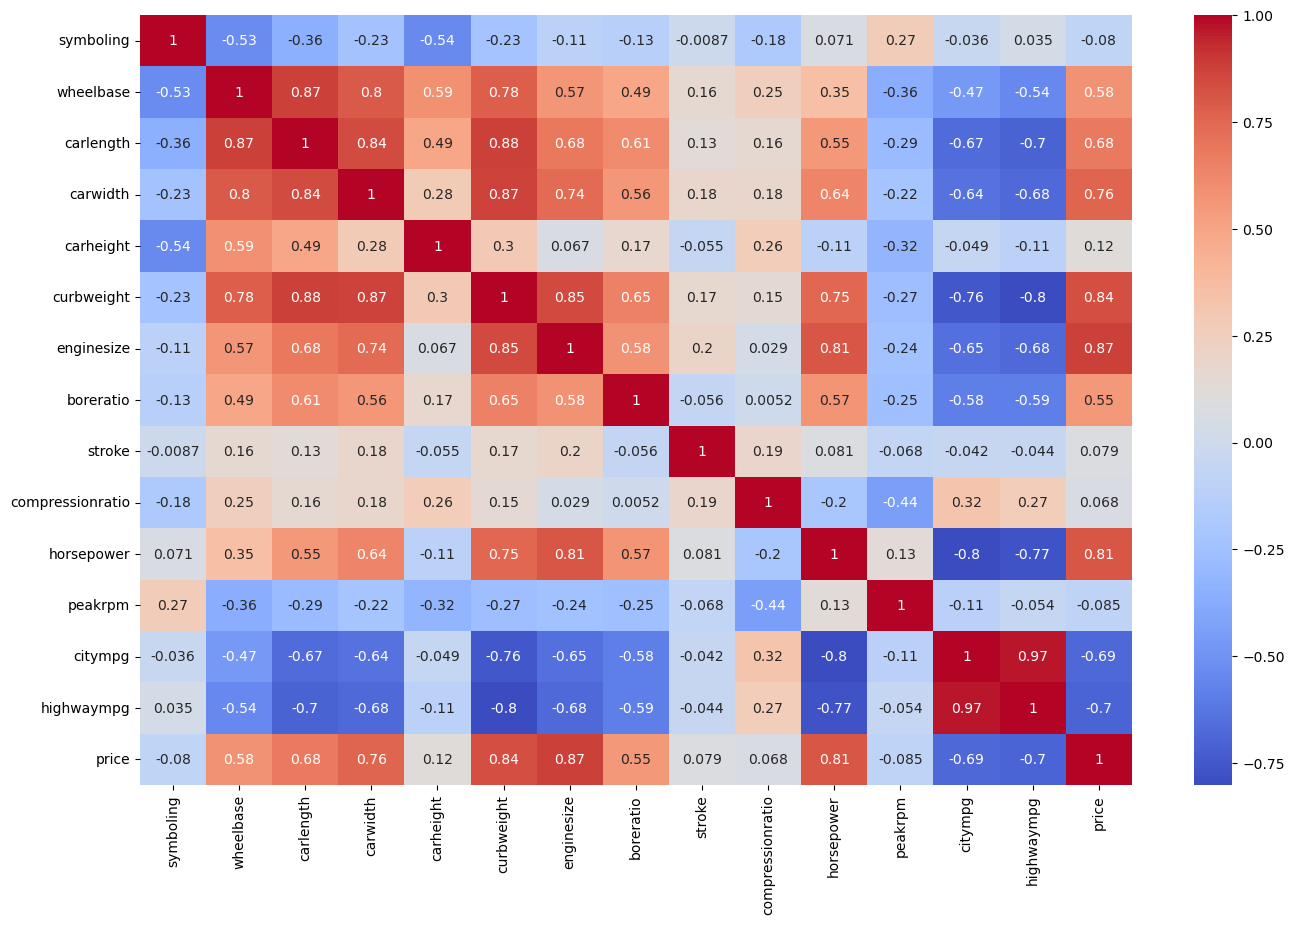

In [389]:
plt.figure(figsize = (16, 10))
cor=df.corr()
sns.heatmap(cor, annot = True, cmap="coolwarm")
plt.show()

## Positive relation with dependent price varible like
wheelbase<br>
carlength<br>
carwidth<br>
curbweight<br>
enginesize<br>
boreratio<br>
horsepower<br>

## Negative relationship between price varible

citympg<br>
highwaympg<br>

Symboling is a categorical variable which has been treeted as a numeric int64 type variable. Let's convert the symboling variable.
<br> 
Let's make the category clear by classifying based on risk
-  -ve symboling as __safe__
-  0, 1 as **moderate**
-  2,3 as **risky**

In [390]:
### removing multicollear
df['mileage'] = 0.6*df['citympg'] + 0.4*df['highwaympg']
df['car_area'] = df['carlength']*df['carwidth']

In [391]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [392]:
calc_vif(df[[i for i in df.describe().columns if i not in ['car_ID','symboling','price']]])

variables          VIF
0          wheelbase  2035.391799
1          carlength  5967.008485
2           carwidth  2540.150397
3          carheight  1071.219732
4         curbweight   415.171767
5         enginesize    68.802461
6          boreratio   326.443706
7             stroke   132.002384
8   compressionratio    16.271830
9         horsepower    65.593106
10           peakrpm   235.885307
11           citympg          inf
12        highwaympg          inf
13           mileage          inf
14          car_area  4298.523126

In [393]:
calc_vif(df[[i for i in df.describe().columns if i not in ['car_ID','symboling','price','citympg','highwaympg','carlength','carwidth','wheelbase']]])

variables         VIF
0         carheight  668.940149
1        curbweight  389.795160
2        enginesize   66.992329
3         boreratio  242.927727
4            stroke  113.177021
5  compressionratio   15.509361
6        horsepower   54.798292
7           peakrpm  169.319957
8           mileage   84.869507
9          car_area  725.341987

In [394]:
calc_vif(df[[i for i in df.describe().columns if i not in ['car_ID','symboling','price','citympg','highwaympg','carlength','carwidth','wheelbase','carheight']]])

variables         VIF
0        curbweight  376.377376
1        enginesize   65.533666
2         boreratio  218.697301
3            stroke  113.119992
4  compressionratio   15.053186
5        horsepower   51.995682
6           peakrpm  153.256168
7           mileage   66.036161
8          car_area  574.421761

In [395]:
calc_vif(df[[i for i in df.describe().columns if i not in ['car_ID','symboling','price','citympg','highwaympg','company_cat','price_mean','carwidth','carlength','carheight','car_vol','car_den','wheelbase','car_area','peakrpm','stroke','horsepower','boreratio','curbweight']]])

variables       VIF
0        enginesize  5.170320
1  compressionratio  9.119143
2           mileage  8.201171

In [396]:
numerical_features = ['enginesize','compressionratio','mileage']

In [397]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [398]:
df['company'] = df['CarName'].str.split(" ", expand=True)[0]
df['company'] = df['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})
df['company'] = df['company'].str.title()
df['company'].value_counts()

Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Volkswagen     12
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
Bmw             8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Jaguar          3
Chevrolet       3
Alfa-Romero     3
Renault         2
Mercury         1
Name: company, dtype: int64

In [399]:
categorical_features = df.describe(include=['object','category']).columns

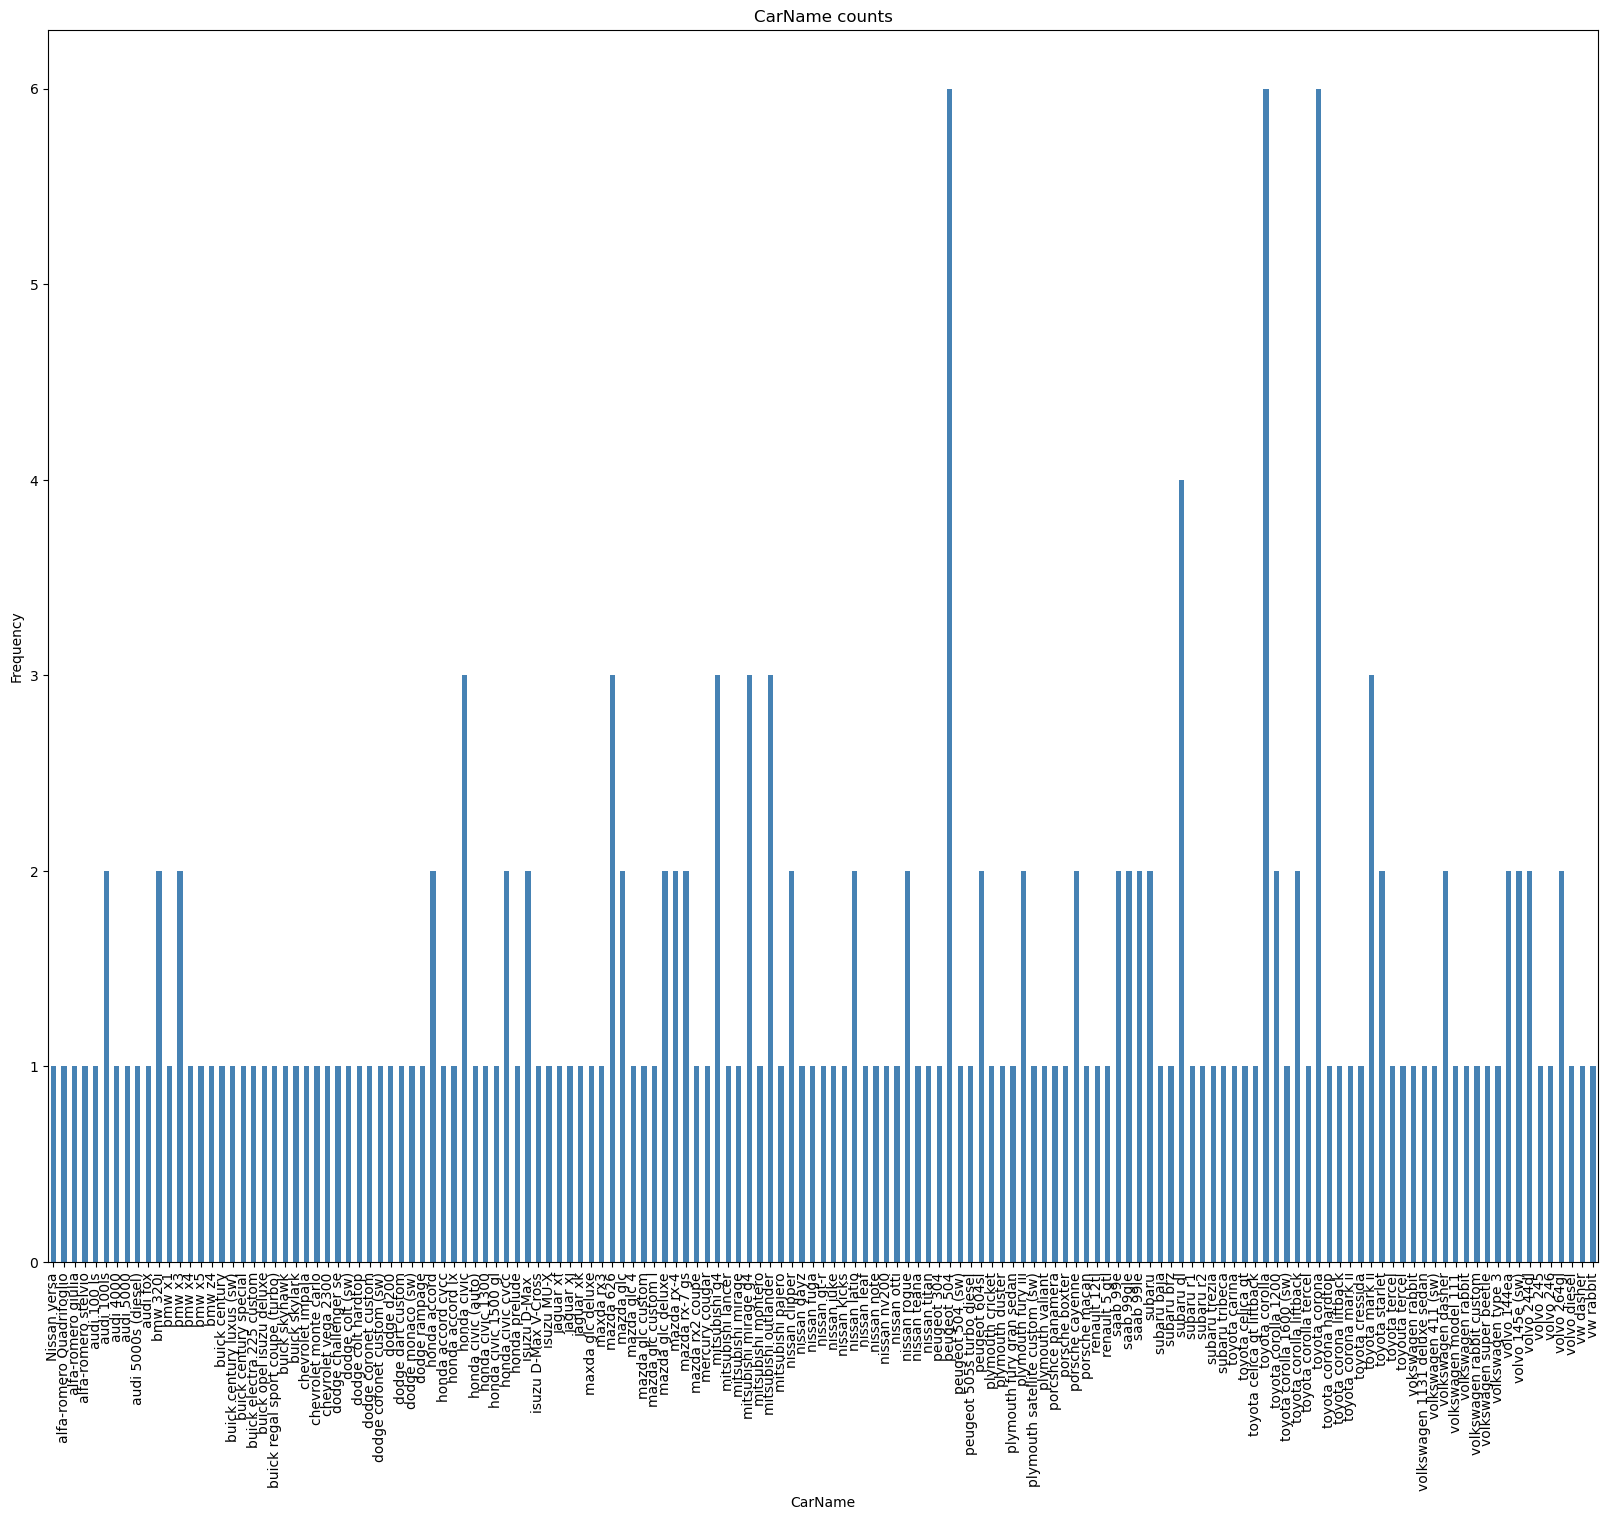

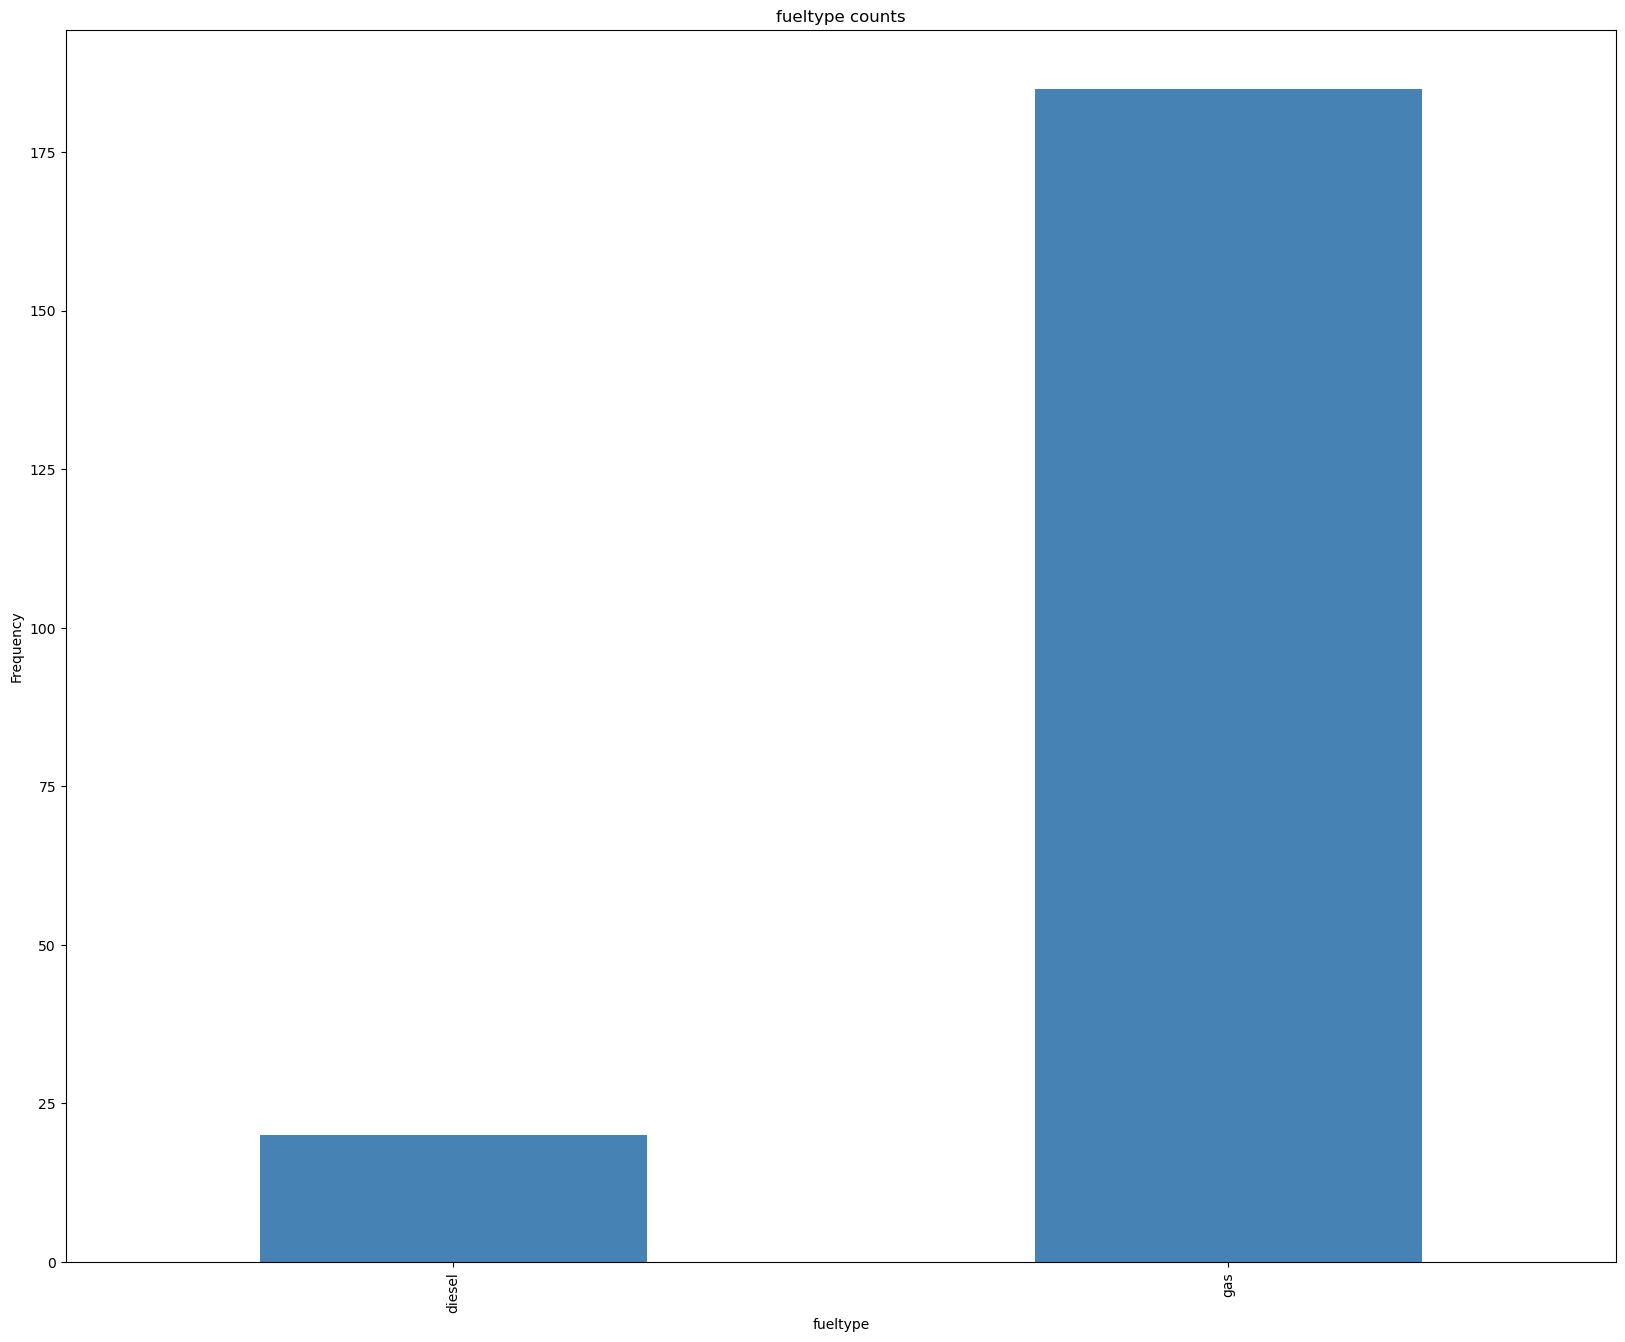

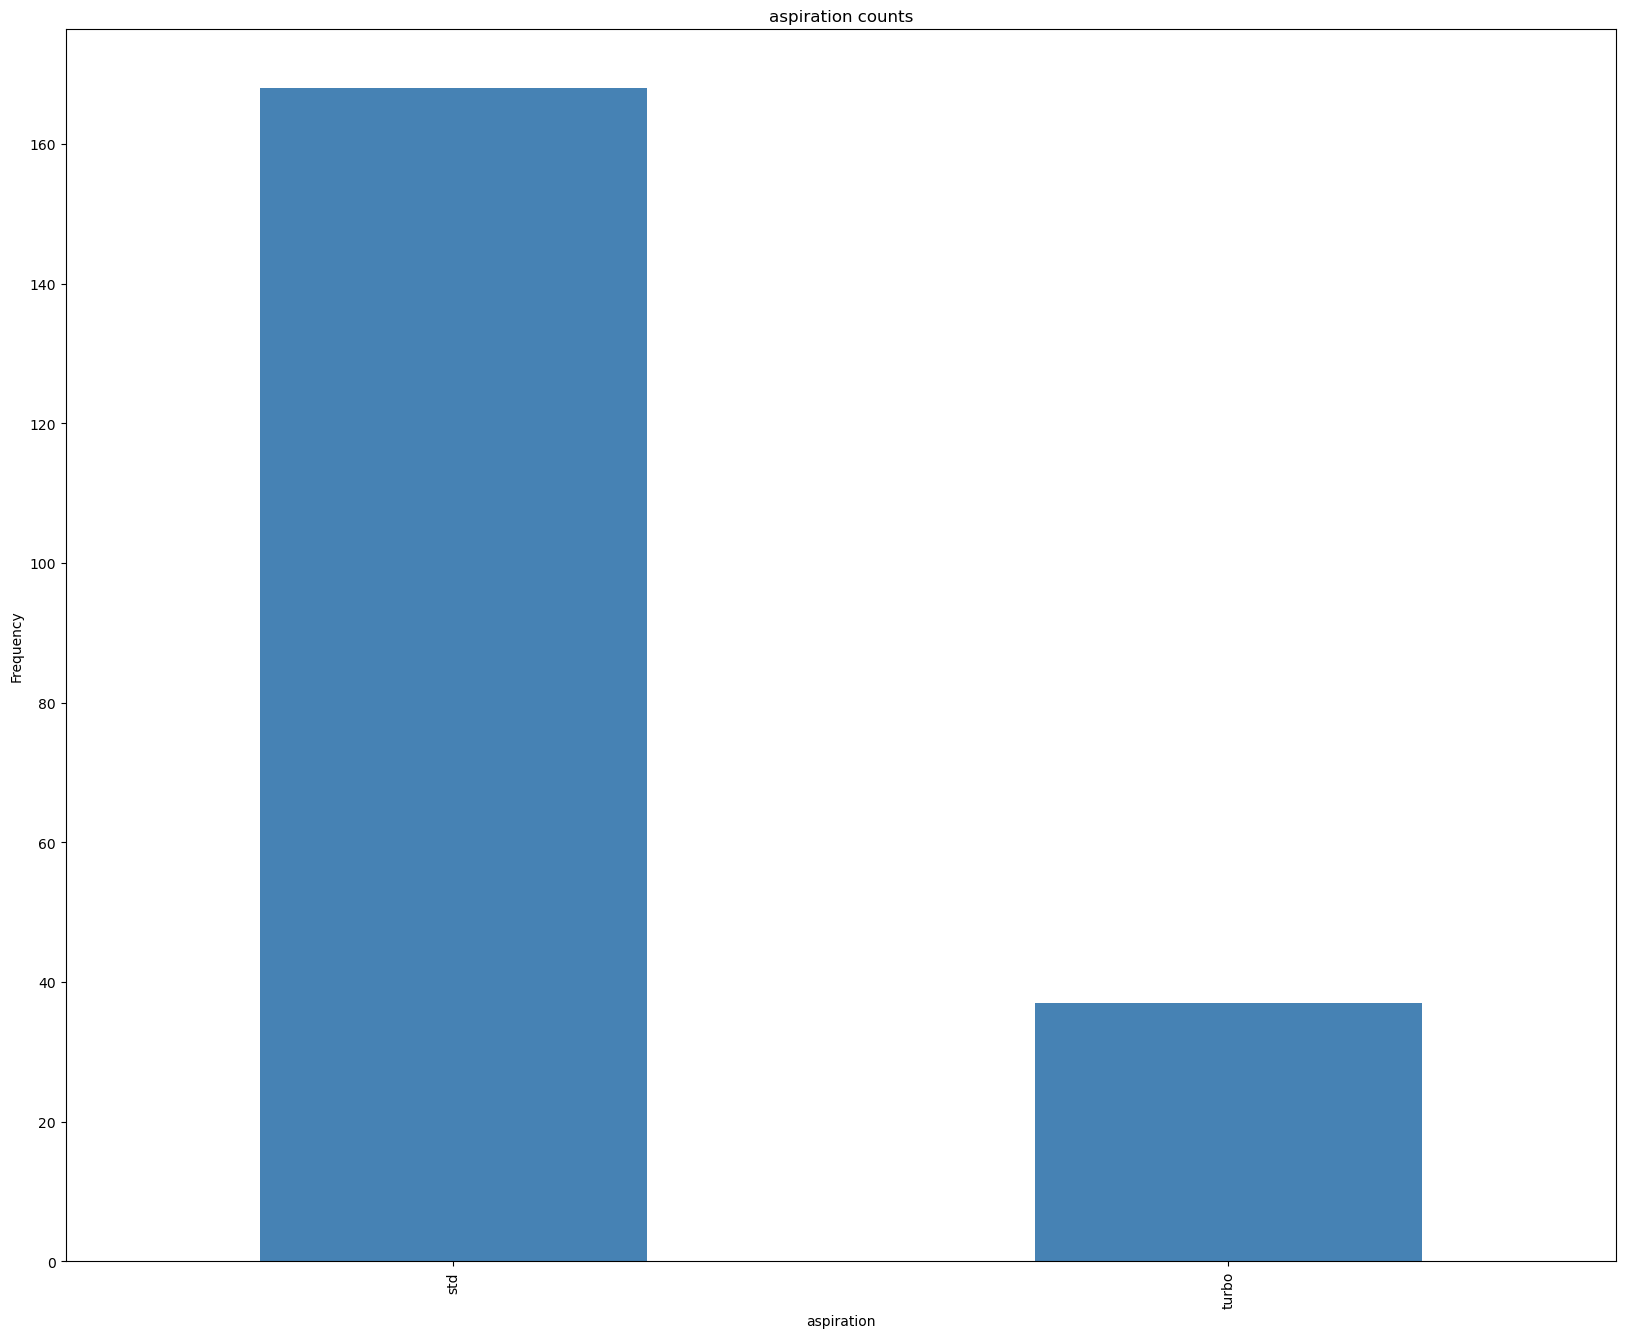

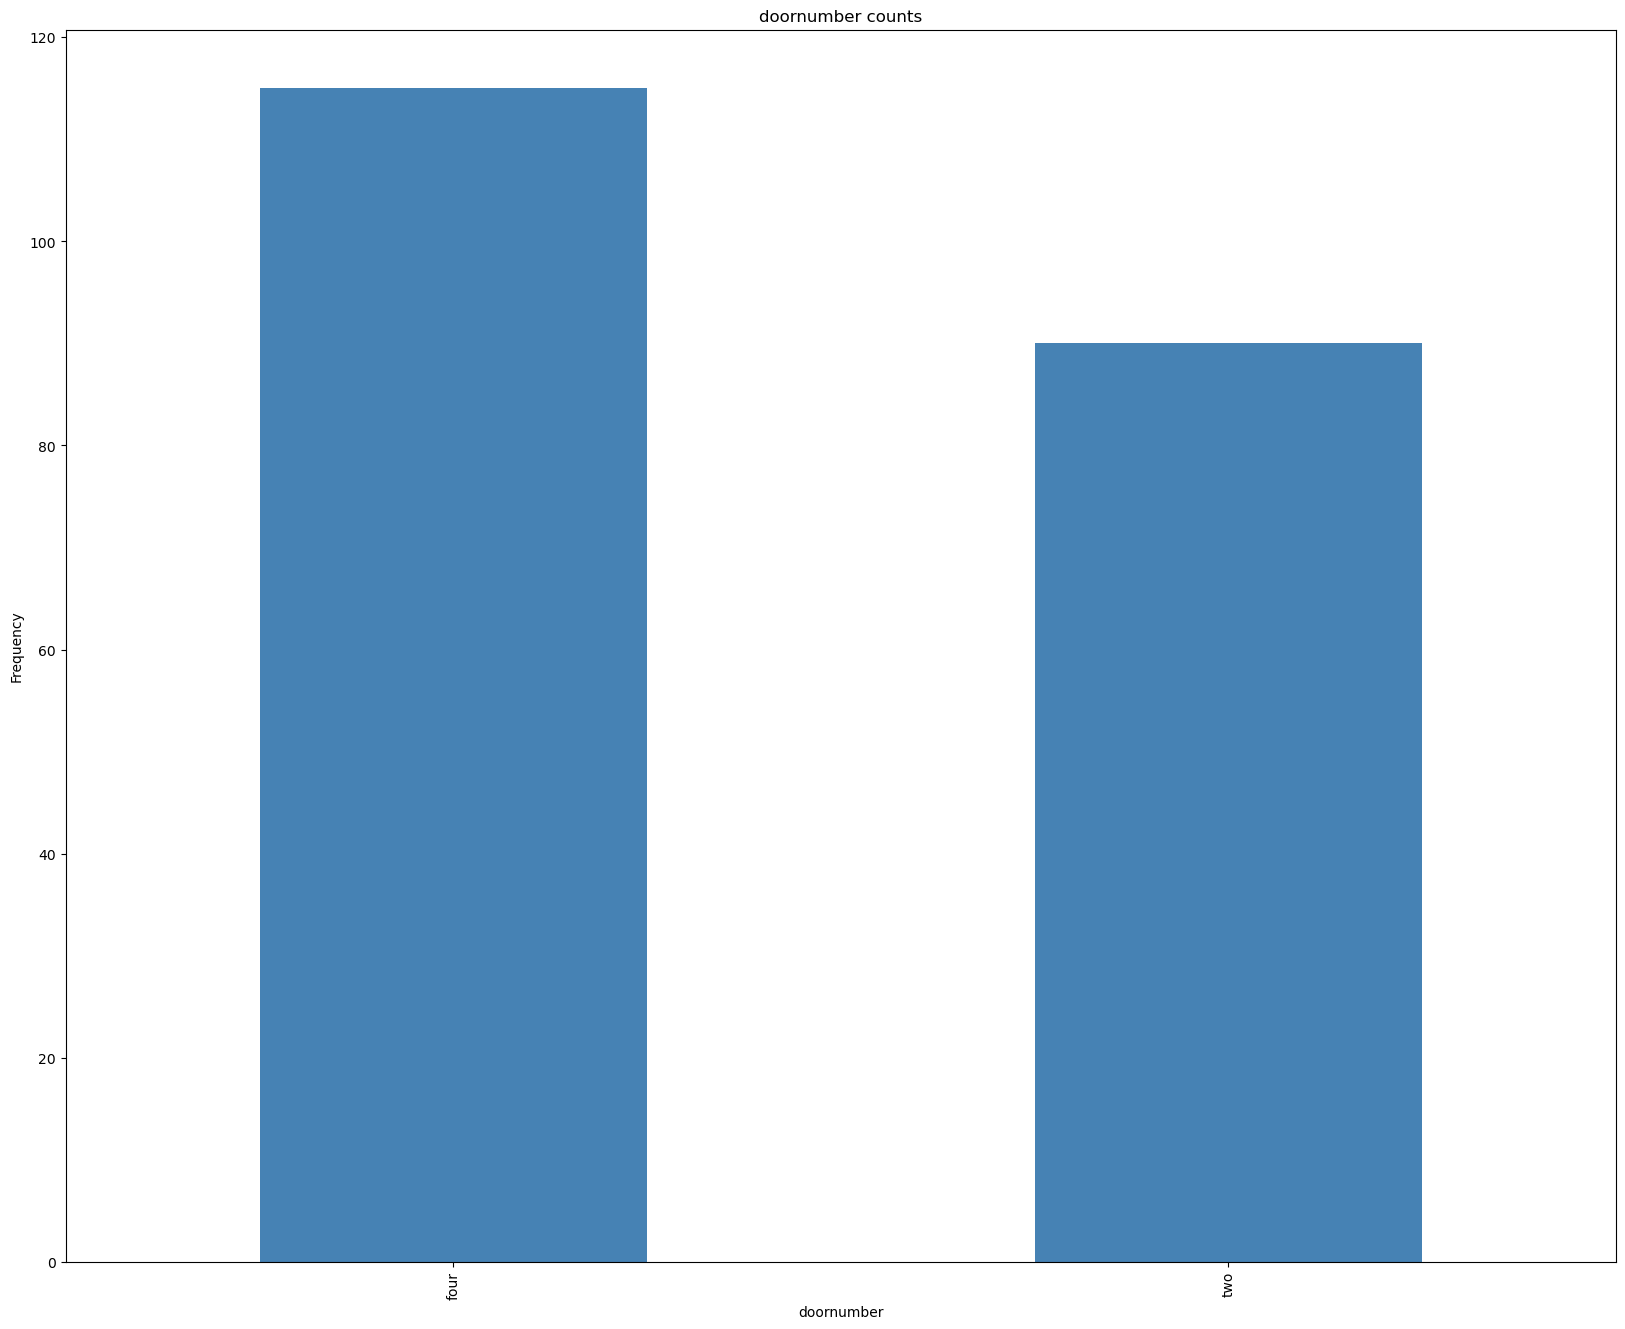

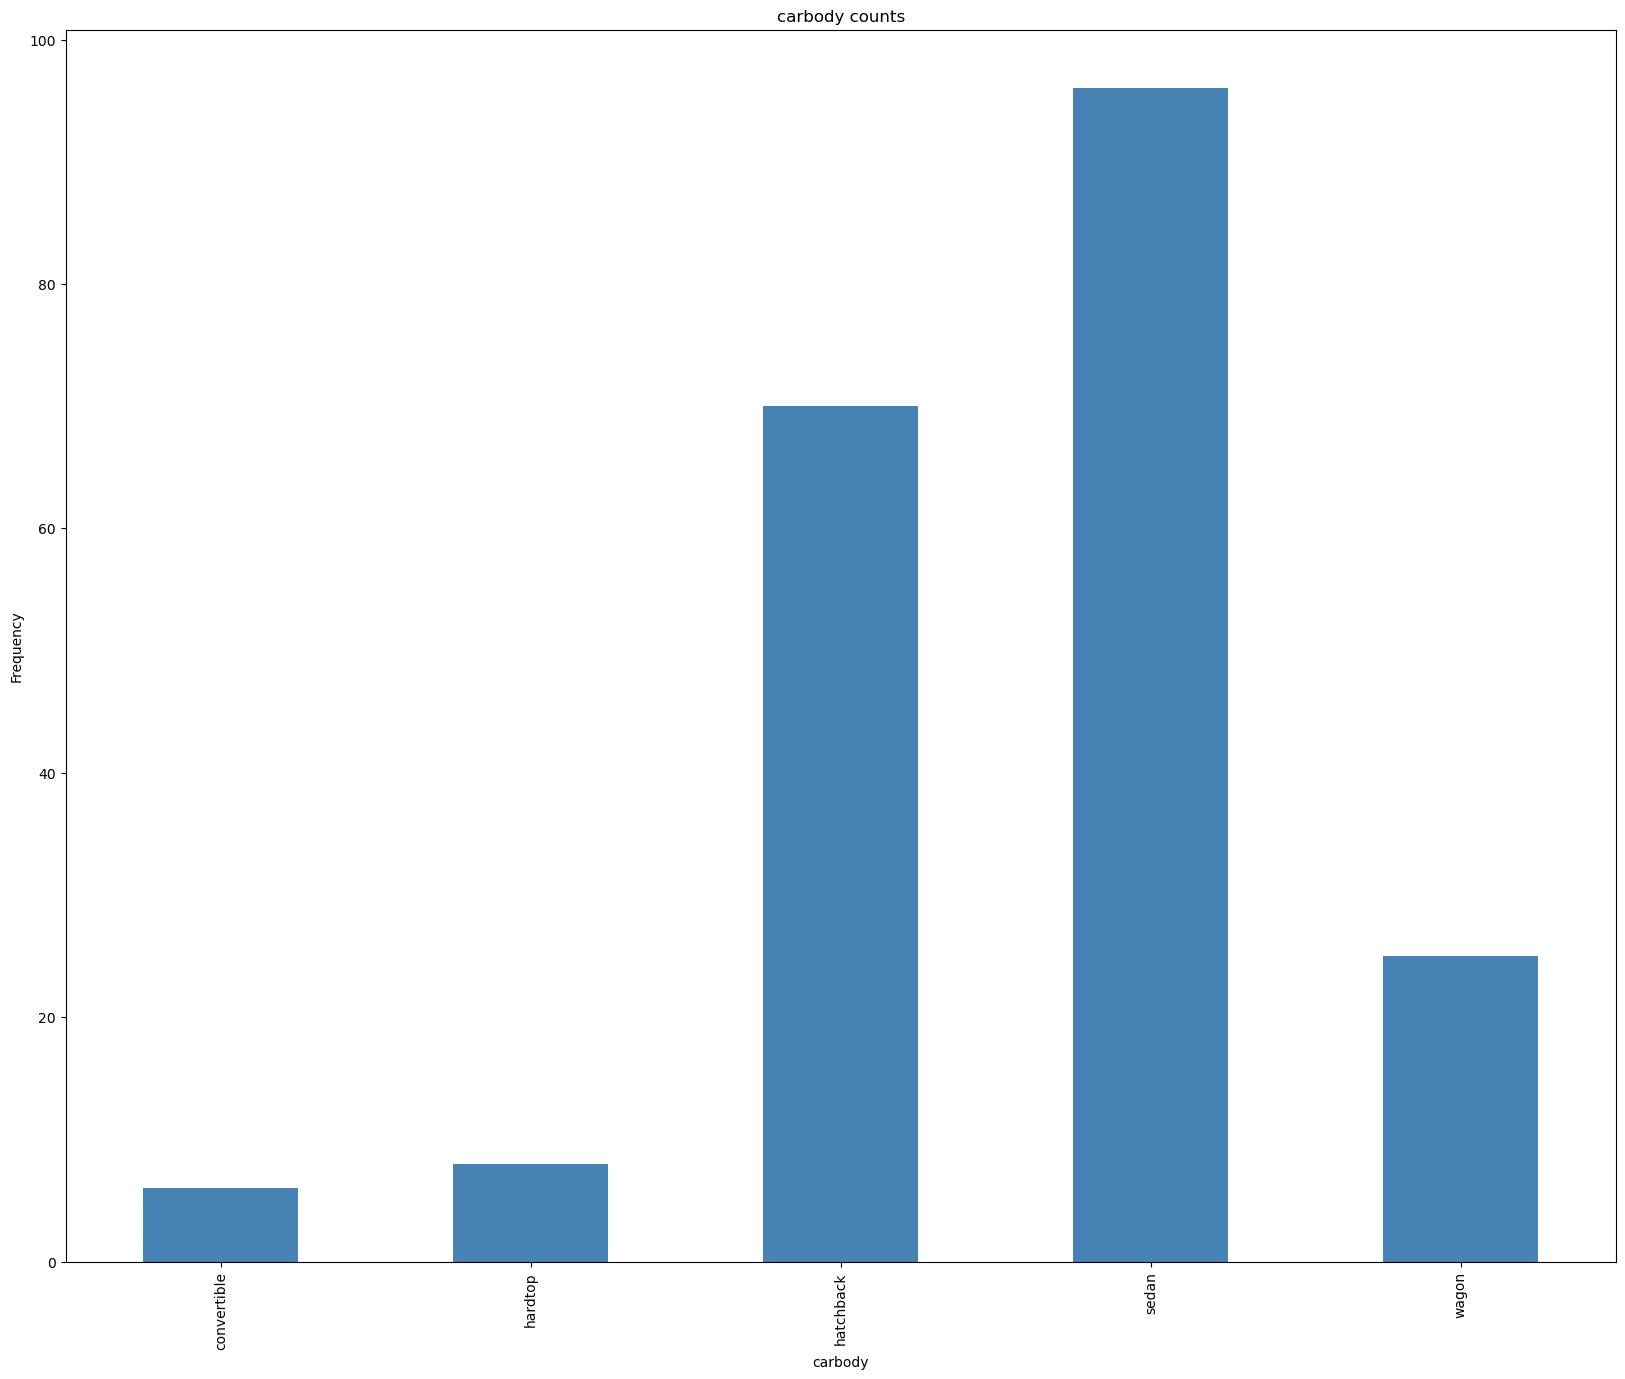

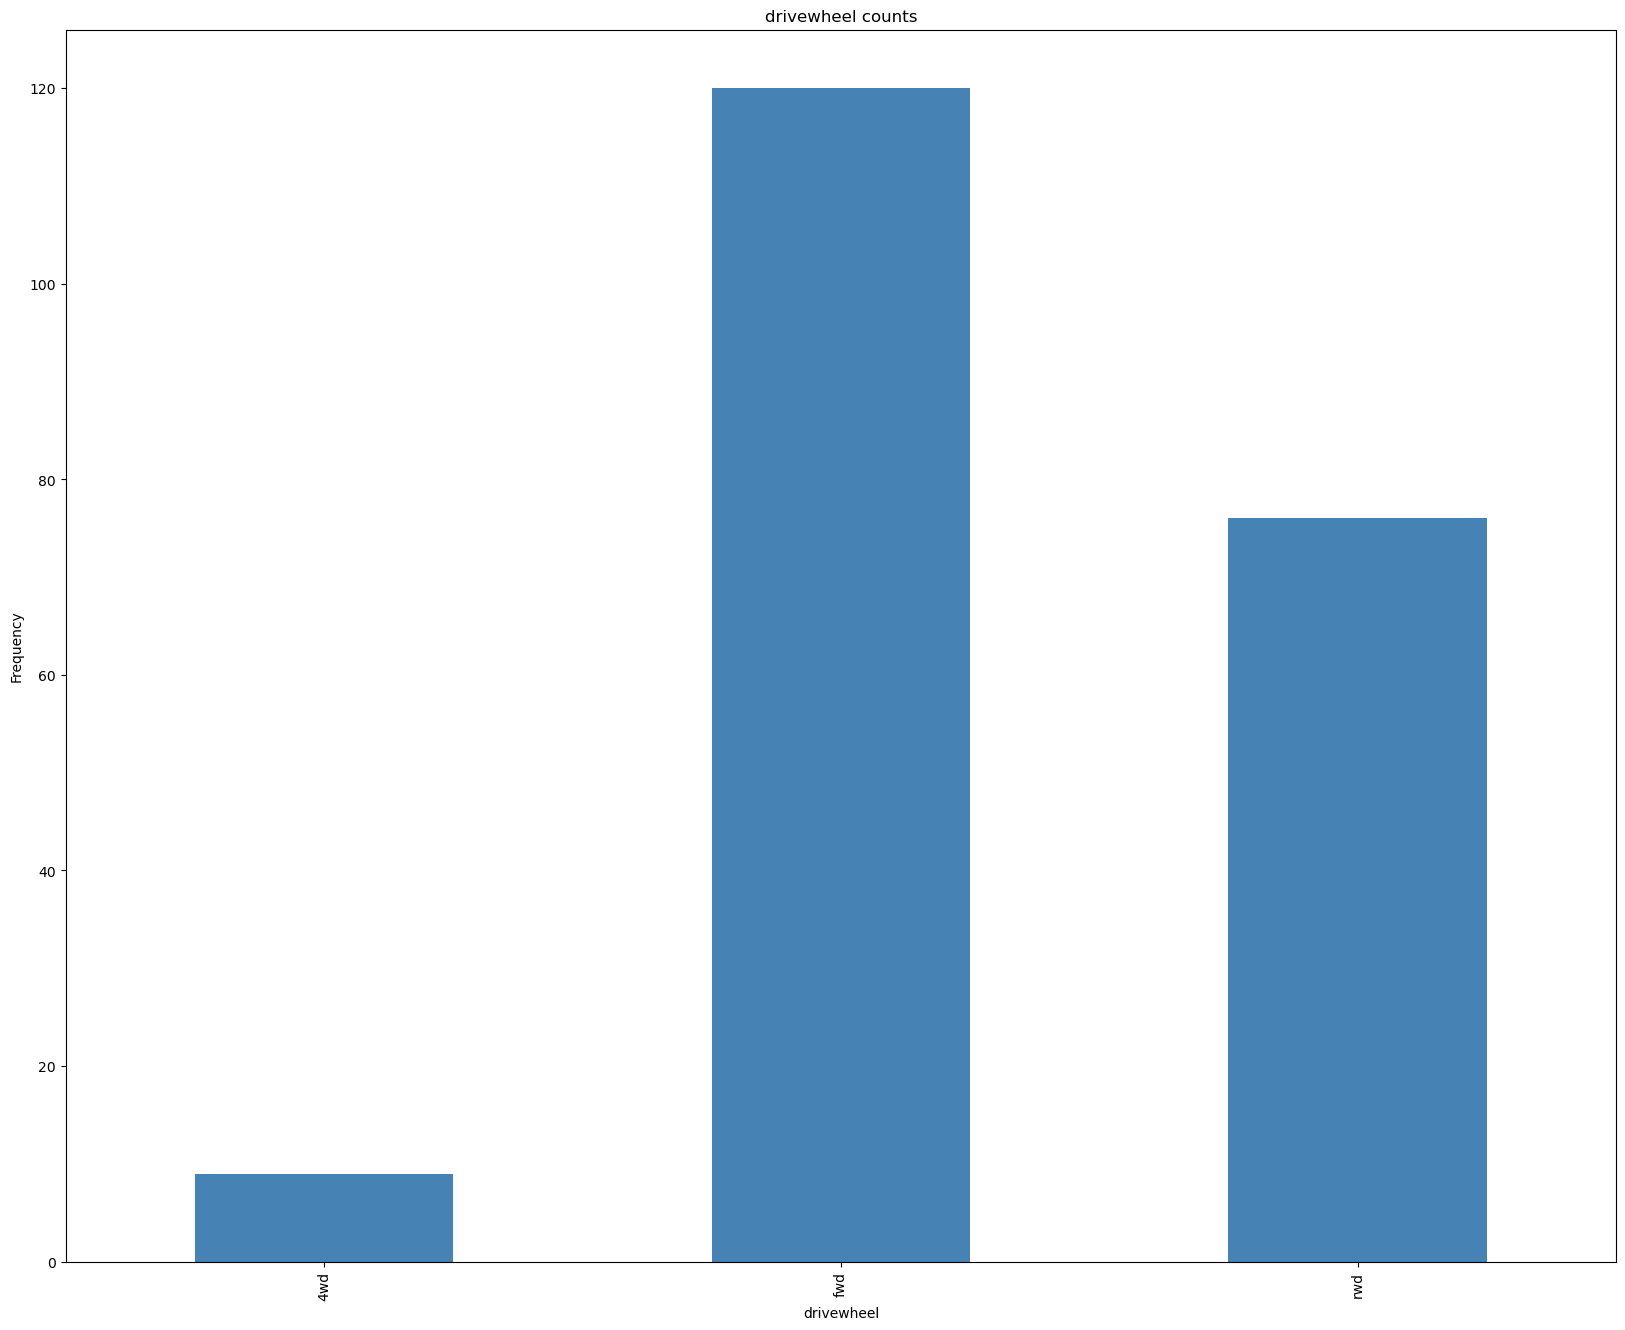

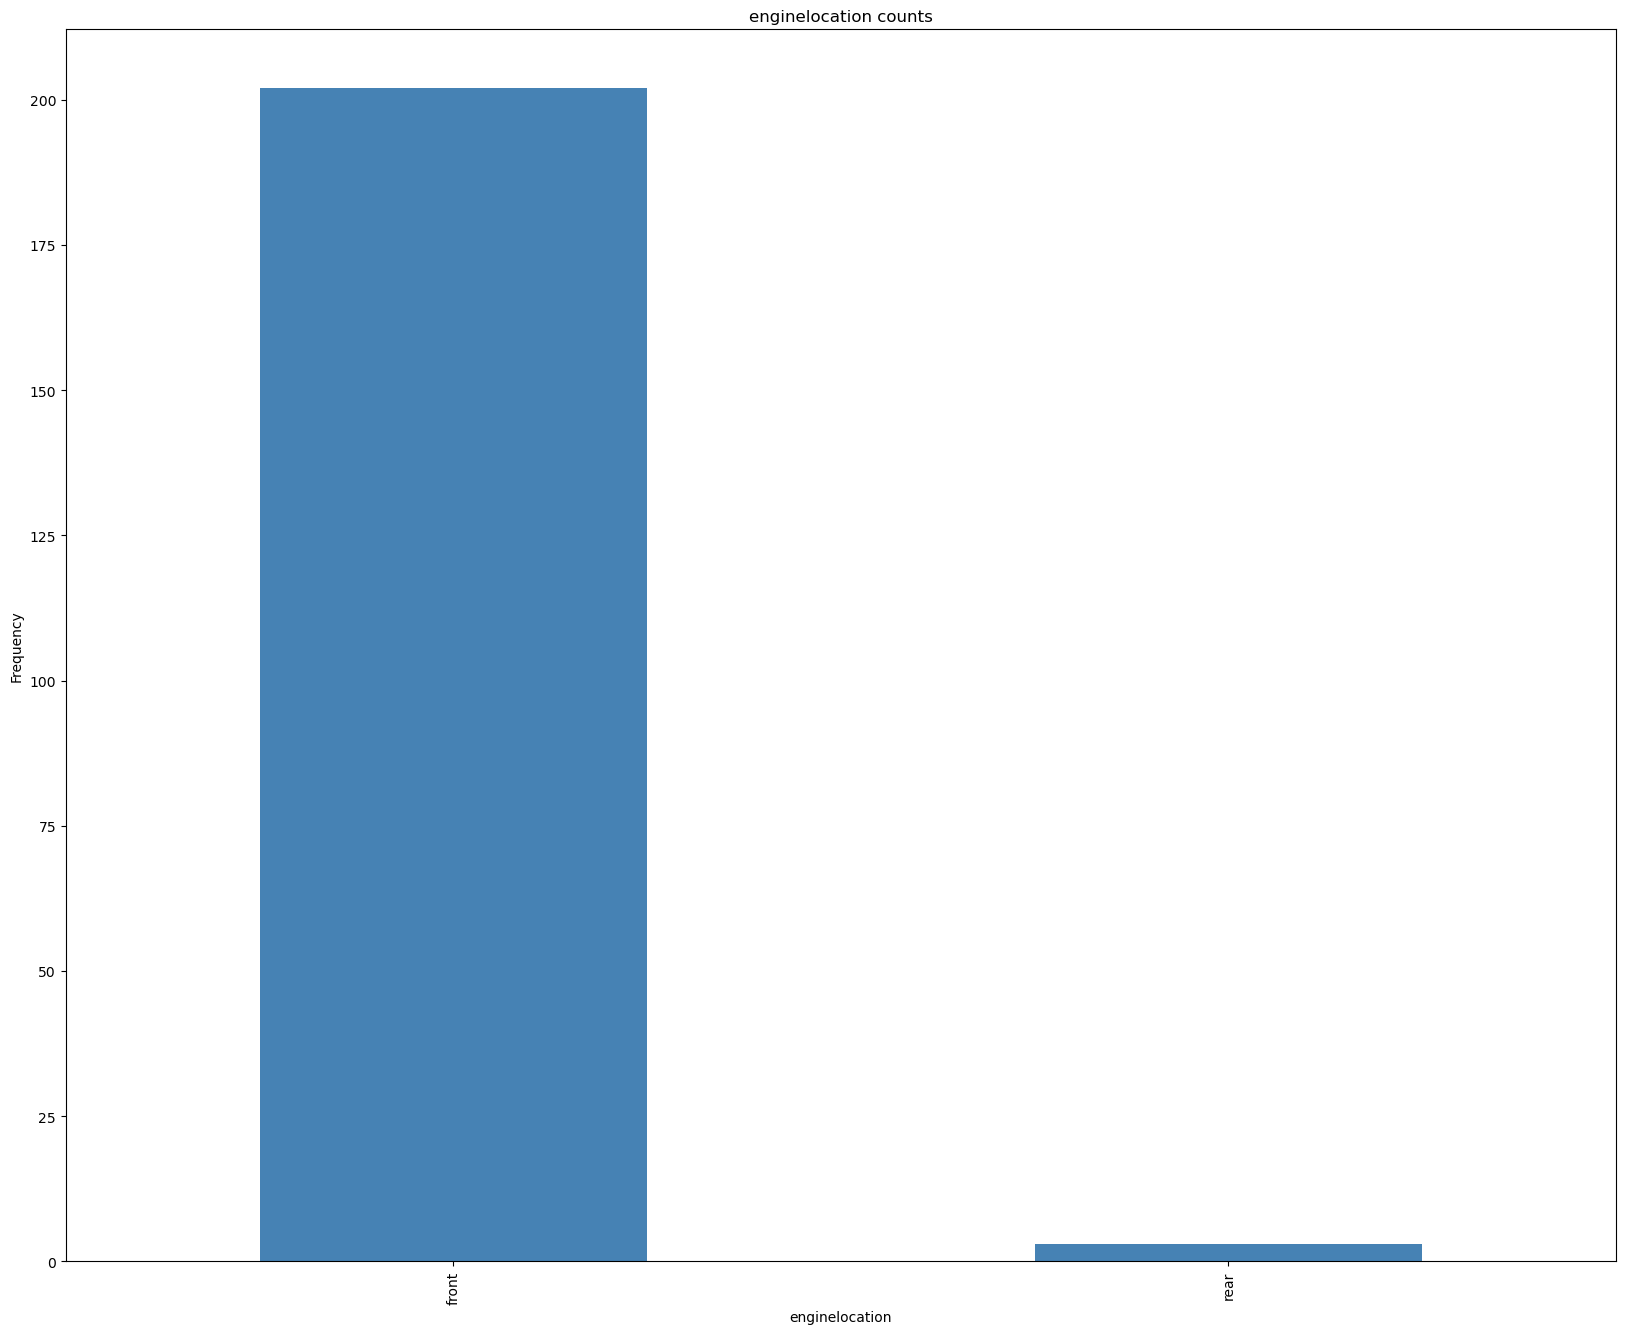

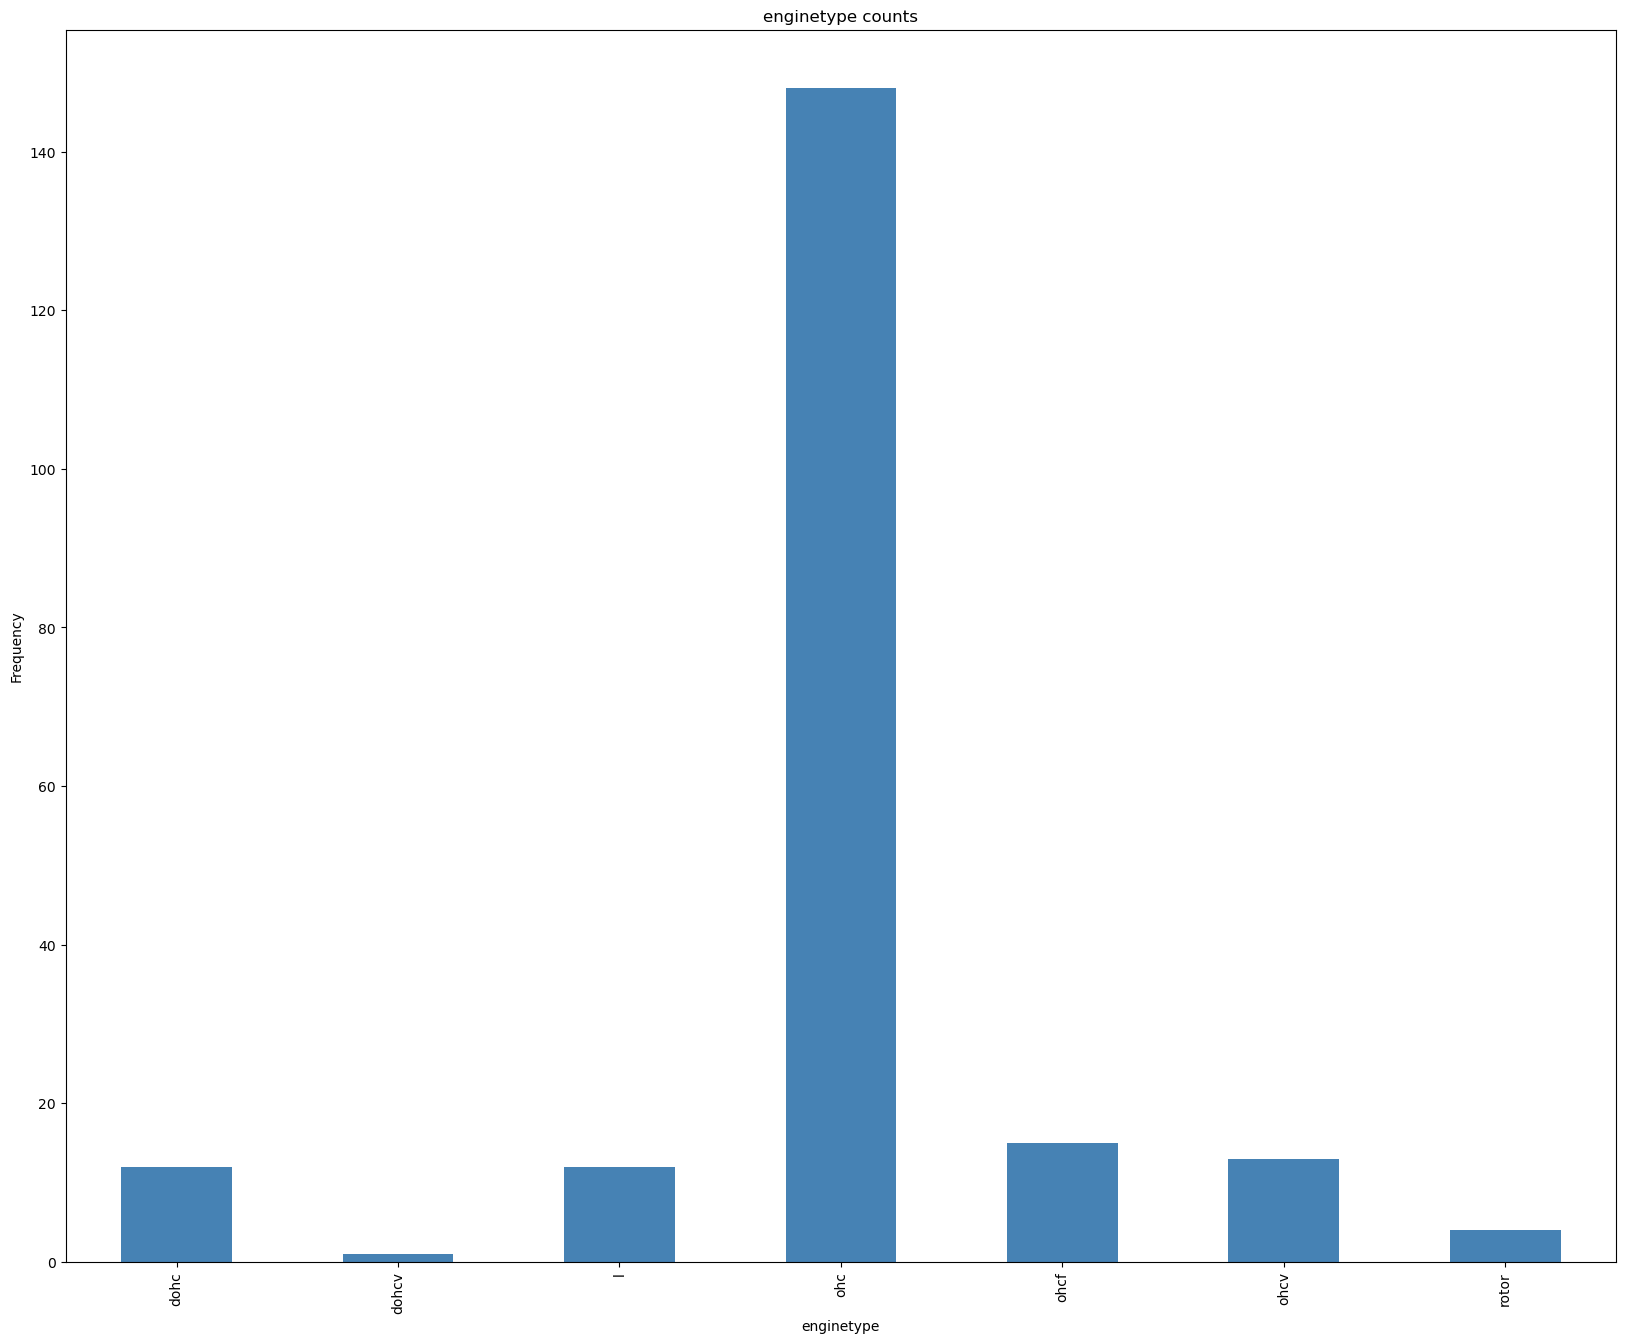

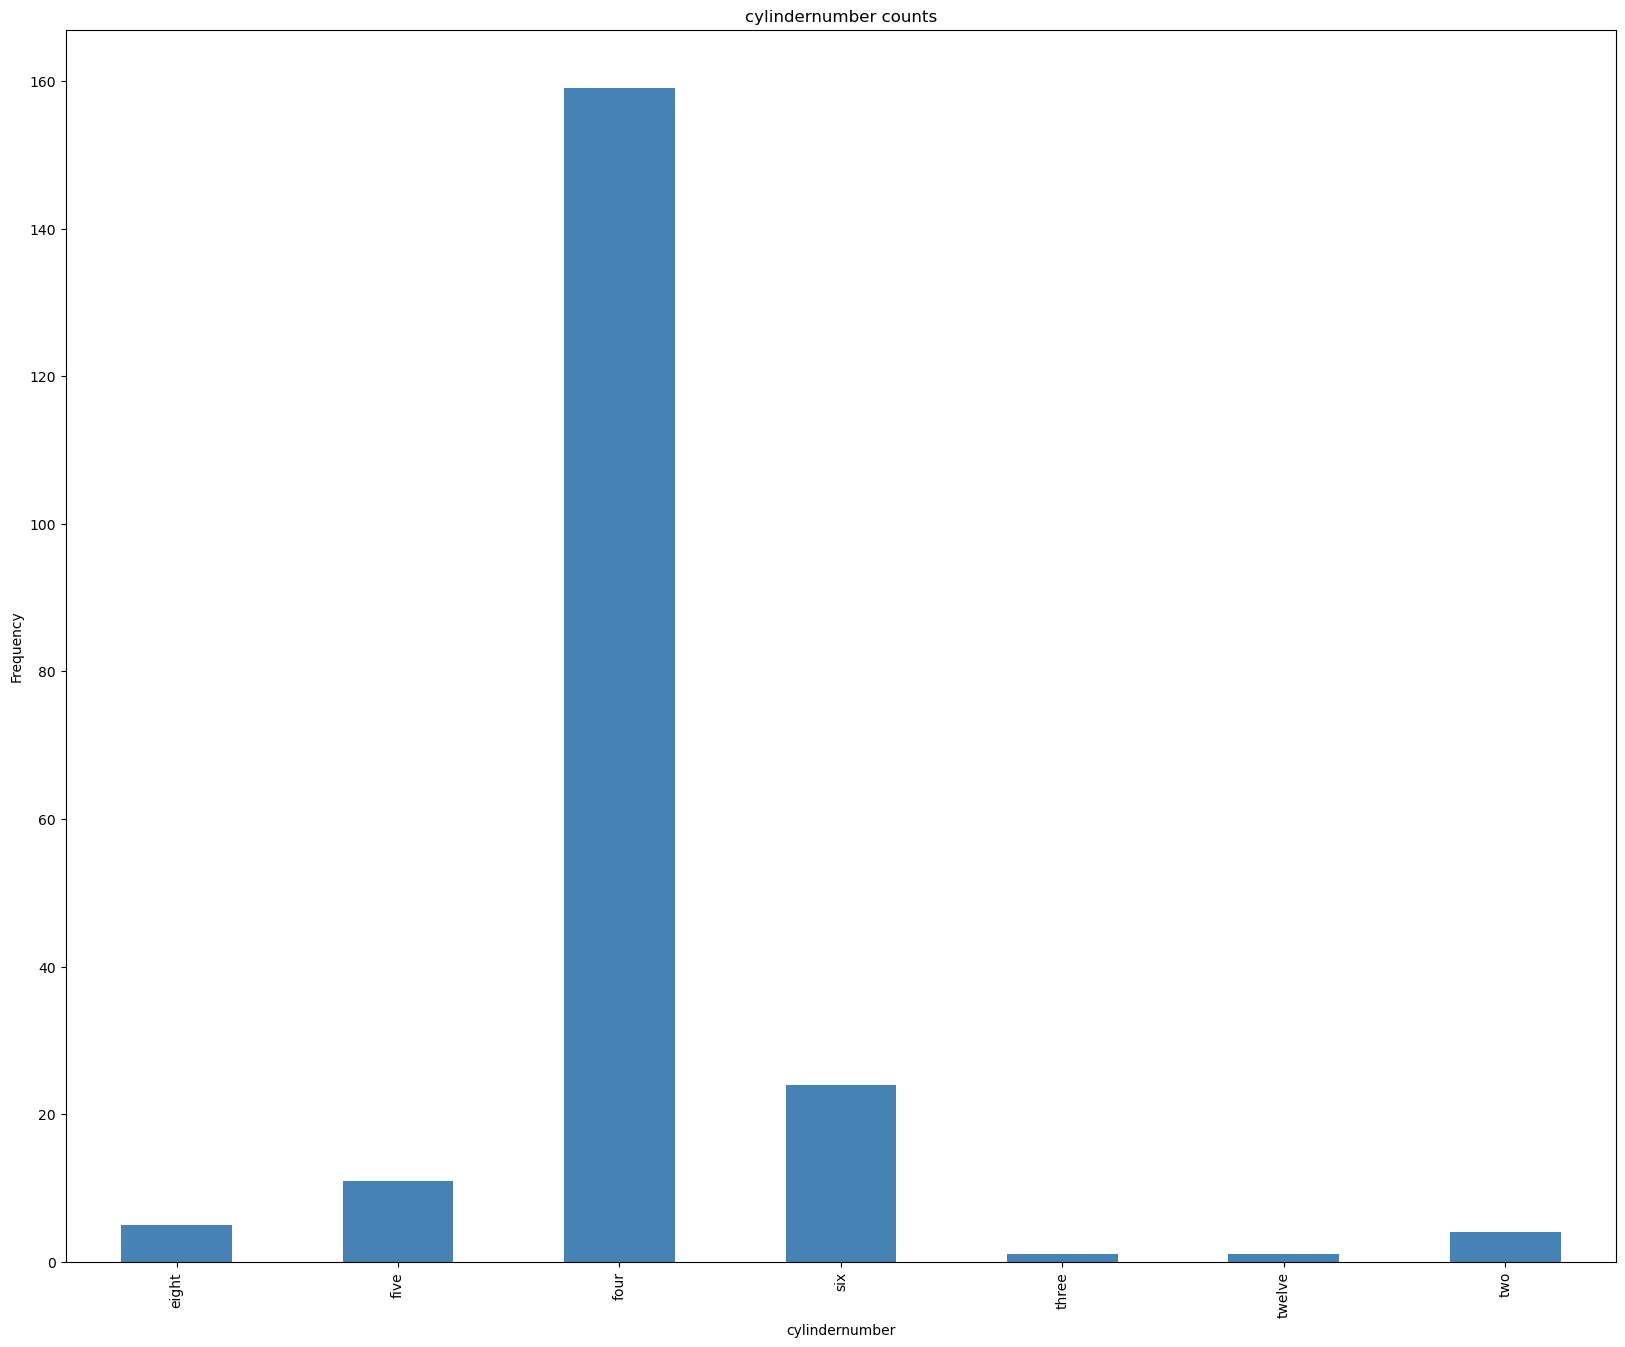

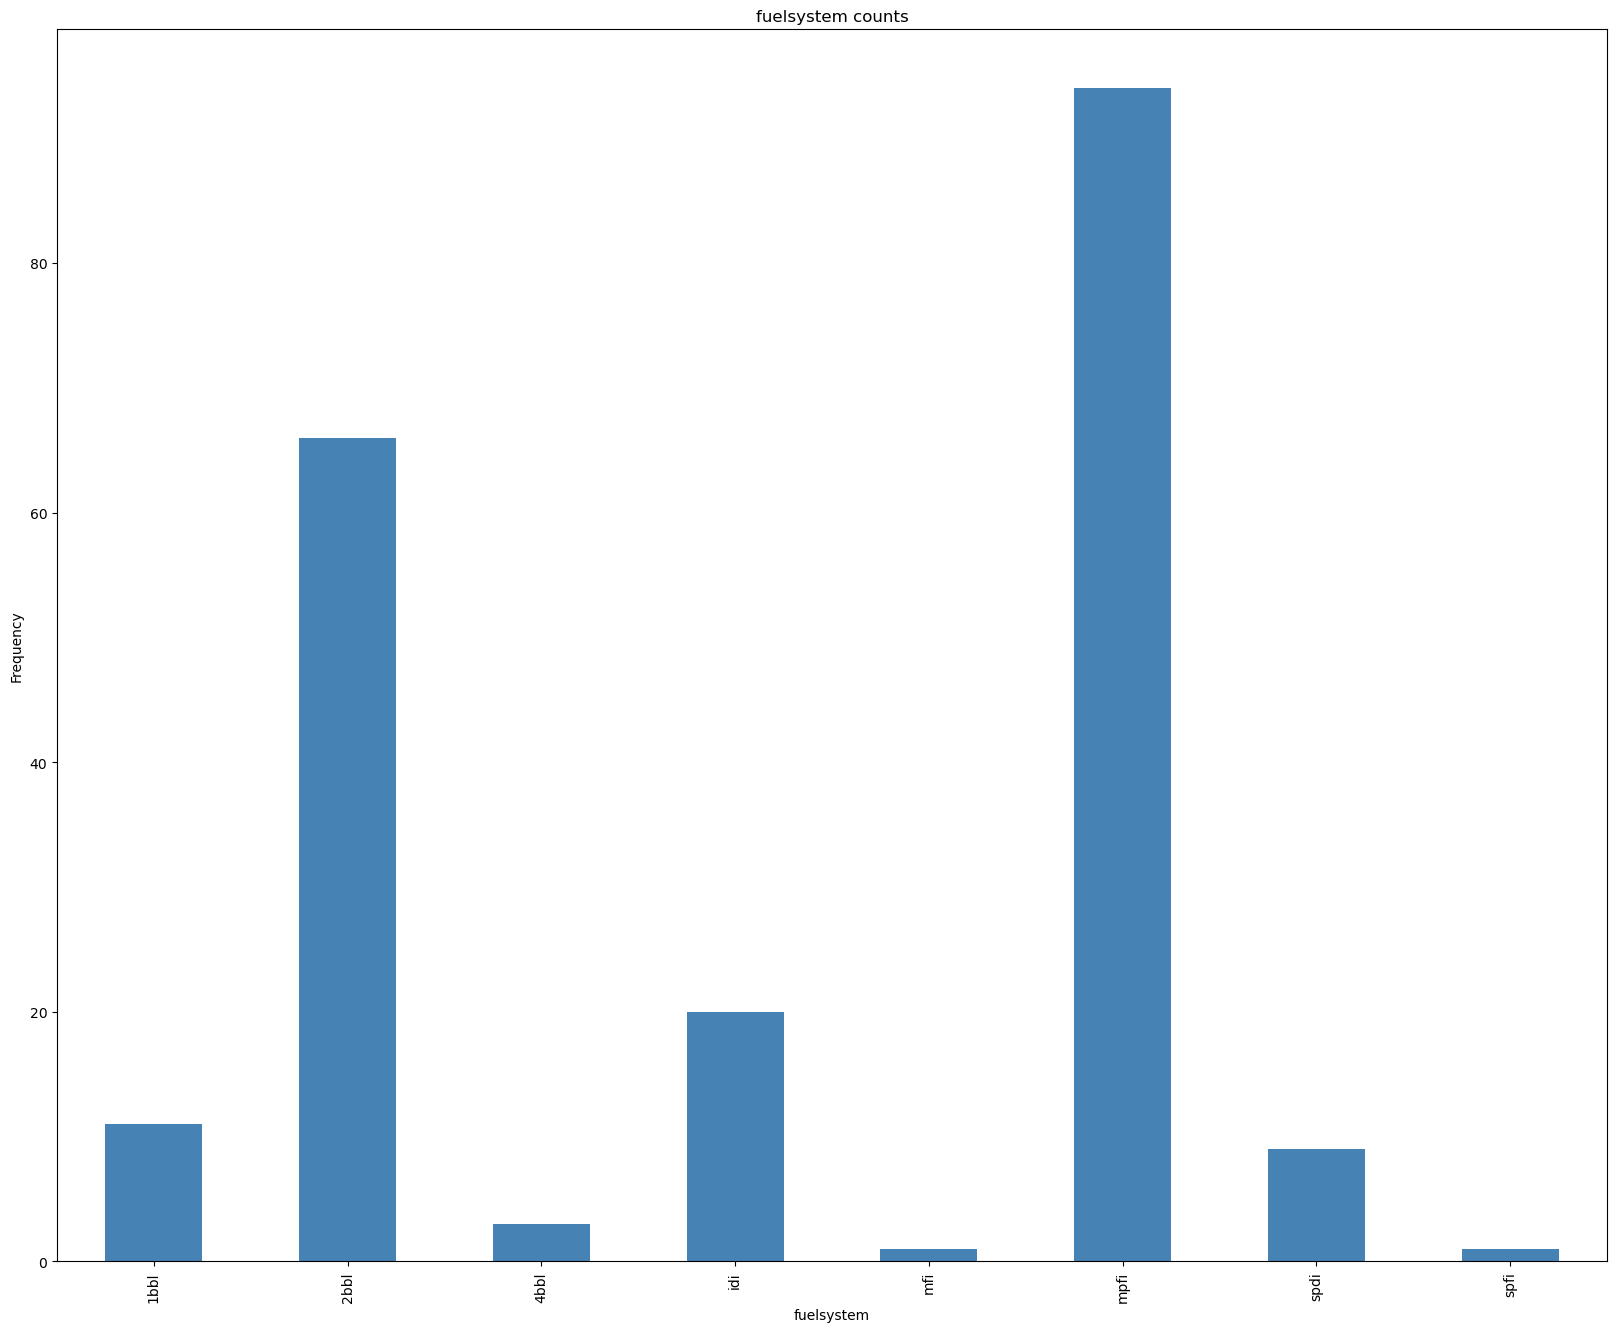

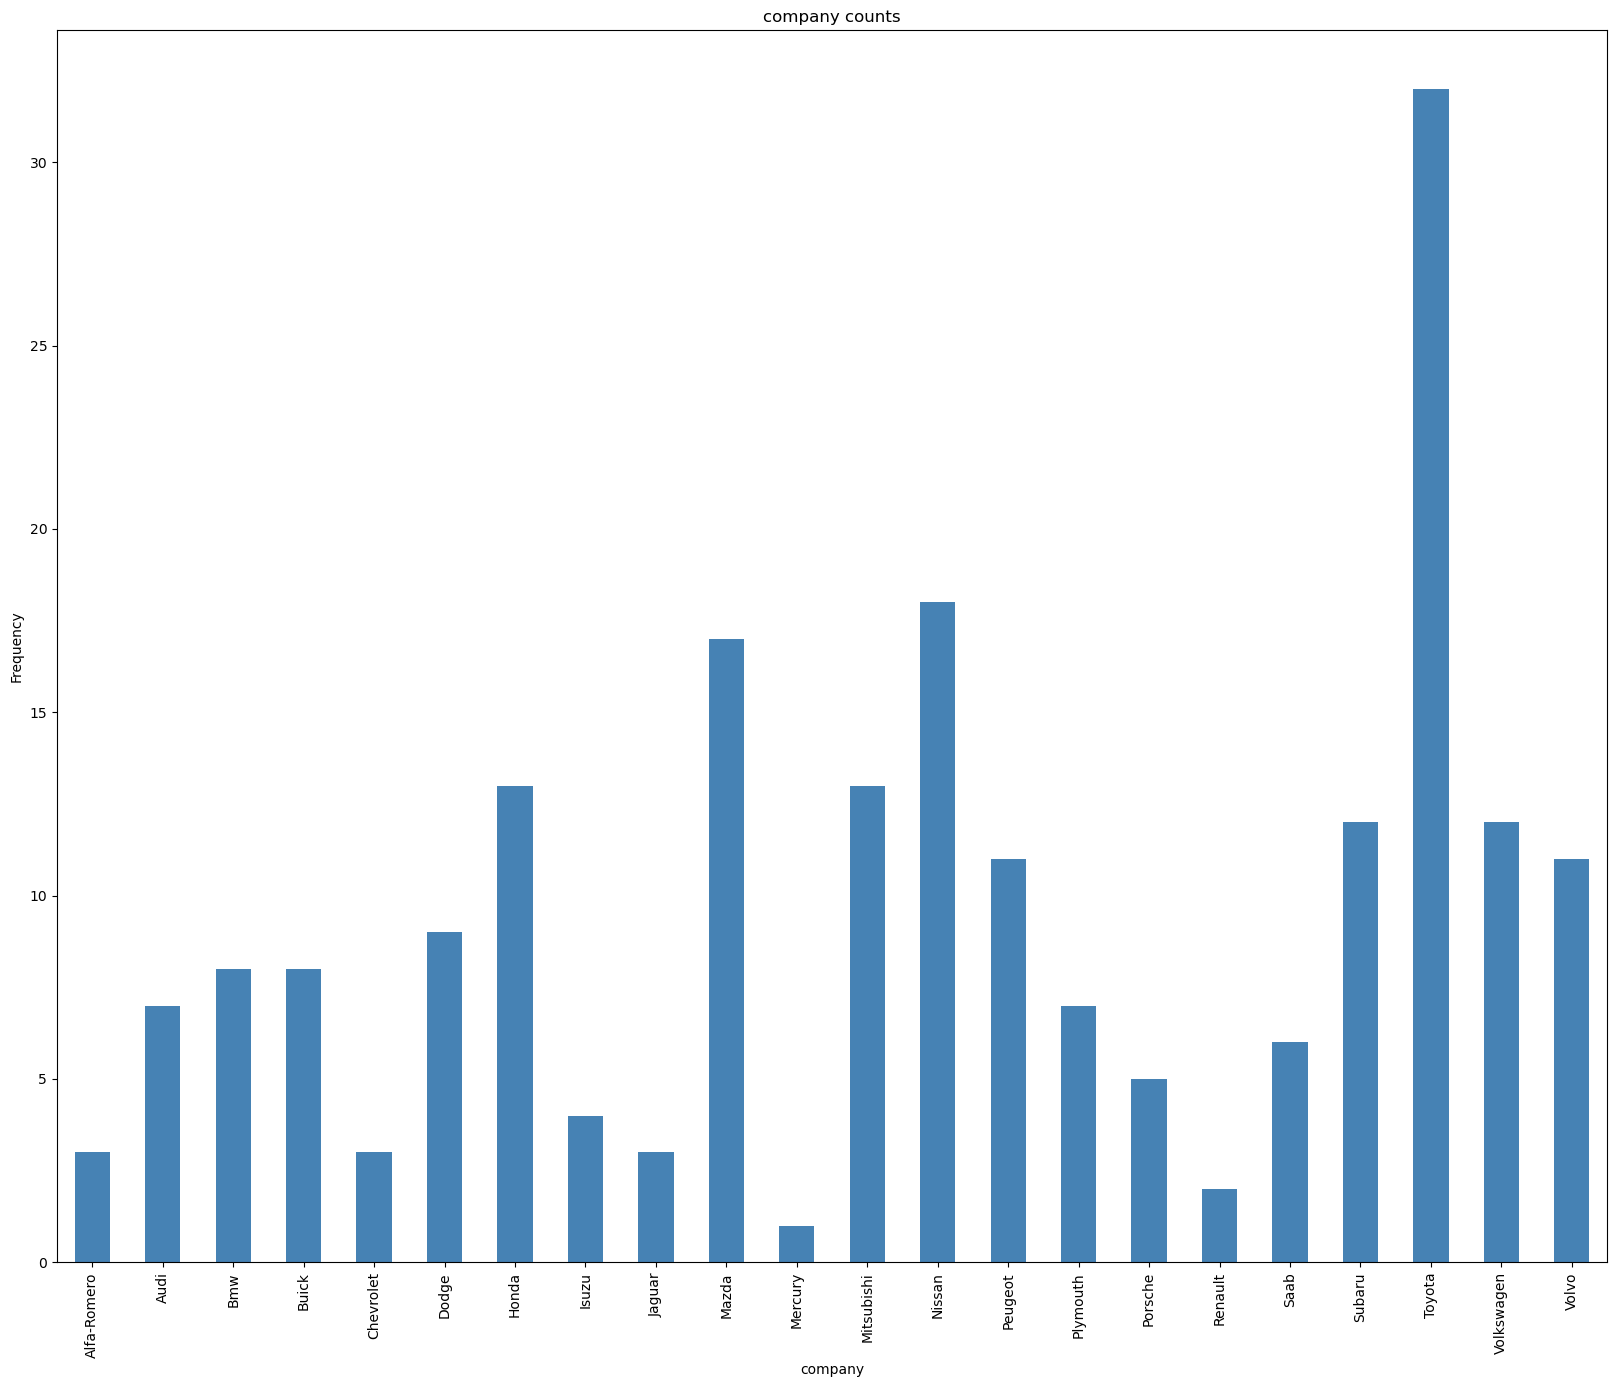

In [400]:
# plot a bar plot for each categorical feature count

for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(20, 16))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

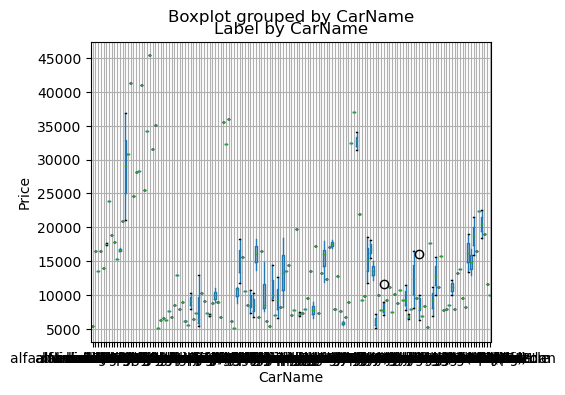

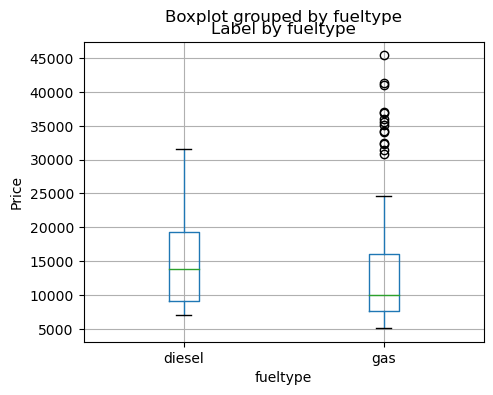

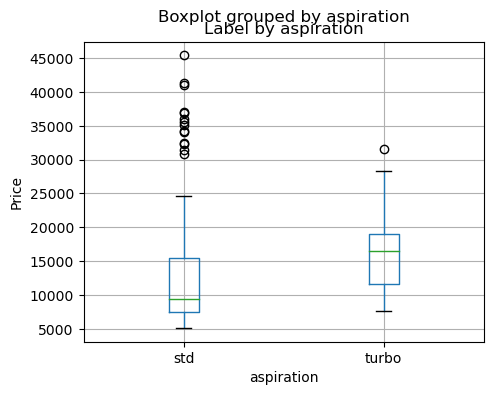

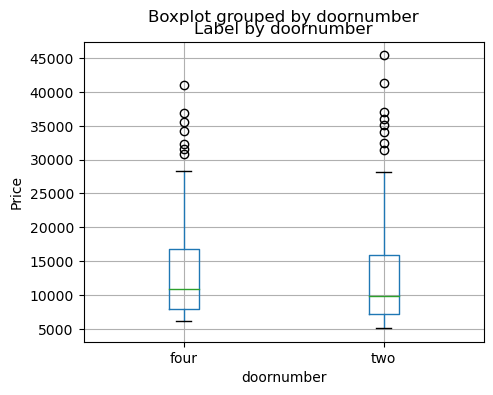

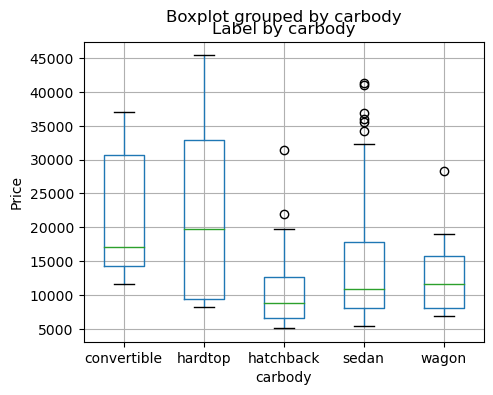

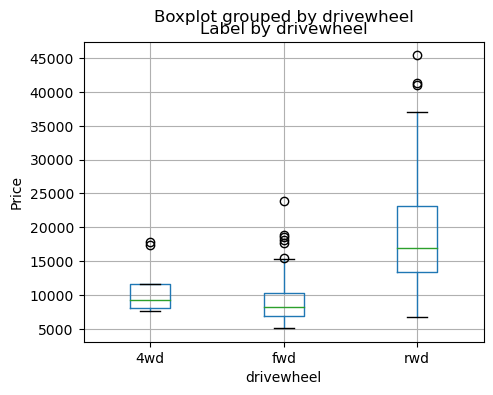

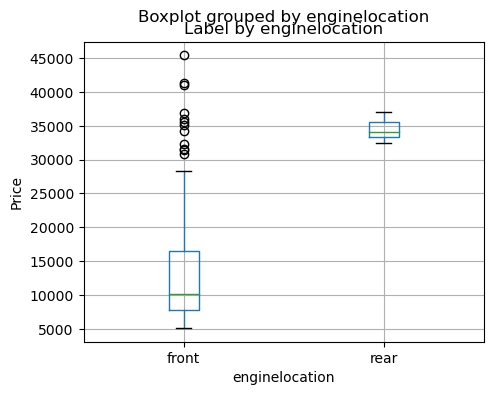

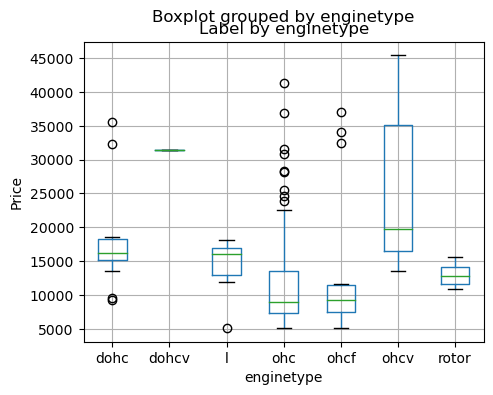

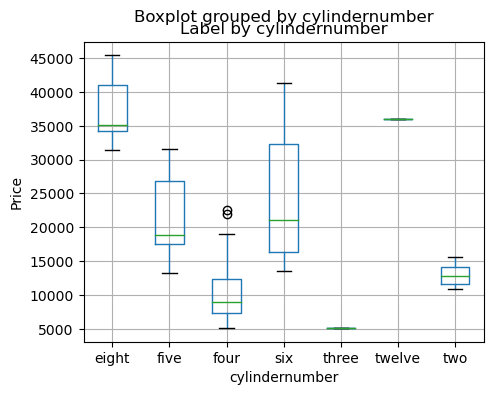

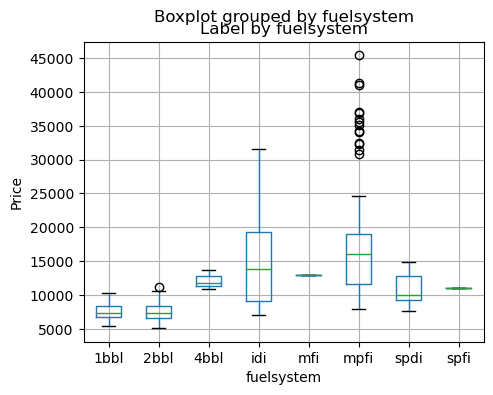

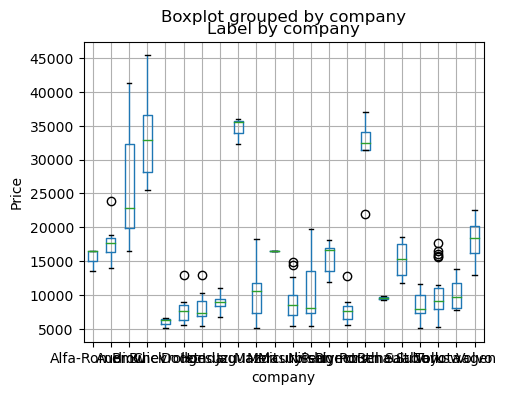

In [402]:
# plot a boxplot for the label by each categorical feature

for col in categorical_features:
    fig = plt.figure(figsize=(5,4))
    ax = fig.gca()
    df.boxplot(column = 'price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

<Figure size 2000x600 with 0 Axes>

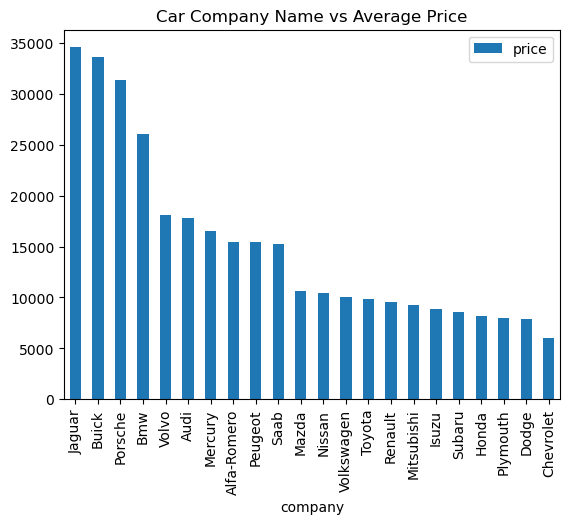

In [403]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(df.groupby(['company'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [404]:
df_autox.rename(columns={'price':'price_mean'},inplace=True)

In [405]:
df = df.merge(df_autox,on = 'company',how = 'left')

In [406]:
df['company_cat'] = df['price_mean'].apply(lambda x : 0 if x < 12000 else (1 if 12000 <= x < 24000 else 2))

In [407]:
df.head()

symboling                   CarName fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   horsepower  peakrpm  citympg highwaympg    price  mileage  car_area  \
0         111     5000       21         27  13495.0     23.4  10820.08   
1         111     5000       21         27  16500.0     23.4  10820.08   
2         154     5000       19         26  16500.0     21.8  11213.60   
3         102     5500       24         30  13950.0     26.4  11690.92   
4         115     5500       18         22  17450.0     19.6  11726.24   

       company    price_mean  company_cat  
0  Alfa-Romero  15498.333333            1  
1  Alfa-Romero  15498.333333            1  
2  Alfa-Romero  15498.333333            1  
3         Audi  17859.166714            1  
4         Audi  17859.166714            1  

[5 rows x 30 columns]

## Data Preparation

In [409]:
df.shape

(205, 30)

In [410]:
dataset_pr = df.copy()

In [411]:
dataset_pr.shape

(205, 30)

In [412]:
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [413]:
### Data encoding
#label encoding
encoders_nums = {"fueltype":{"diesel":1,"gas":0},
                 "aspiration":{"turbo":1,"std":0},
                 "doornumber":     {"four": 4, "two": 2},
                 "drivewheel":{"fwd":0,"4wd":0,"rwd":1},
                 "cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }
                 }

dataset_pr = dataset_pr.replace(encoders_nums)

In [414]:
dataset_pr = pd.get_dummies(dataset_pr, columns=["carbody", "enginetype","fuelsystem"], prefix=["body", "etype","fsystem"])

In [415]:
dataset_pr.head()

symboling                   CarName  fueltype  aspiration  doornumber  \
0          3        alfa-romero giulia         0           0           2   
1          3       alfa-romero stelvio         0           0           2   
2          1  alfa-romero Quadrifoglio         0           0           2   
3          2               audi 100 ls         0           0           4   
4          2                audi 100ls         0           0           4   

   drivewheel enginelocation  wheelbase  carlength  carwidth  ...  etype_ohcv  \
0           1          front       88.6      168.8      64.1  ...           0   
1           1          front       88.6      168.8      64.1  ...           0   
2           1          front       94.5      171.2      65.5  ...           1   
3           0          front       99.8      176.6      66.2  ...           0   
4           0          front       99.4      176.6      66.4  ...           0   

   etype_rotor  fsystem_1bbl  fsystem_2bbl  fsystem_4bbl  fsystem_idi  \
0            0             0             0             0            0   
1            0             0             0             0            0   
2            0             0             0             0            0   
3            0             0             0             0            0   
4            0             0             0             0            0   

   fsystem_mfi  fsystem_mpfi  fsystem_spdi  fsystem_spfi  
0            0             1             0             0  
1            0             1             0             0  
2            0             1             0             0  
3            0             1             0             0  
4            0             1             0             0  

[5 rows x 47 columns]

In [416]:
dataset_pr.shape

(205, 47)

In [417]:
features = numerical_features.copy()
features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber','company_cat','body_convertible',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon','etype_dohc', 'etype_l', 'etype_ohc', 'etype_ohcf',
       'etype_ohcv','fsystem_1bbl', 'fsystem_2bbl','fsystem_idi', 'fsystem_mpfi','fsystem_spdi'])

In [418]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = dataset_pr[features].apply(zscore)

In [419]:
y = np.log10(dataset_pr['price'])

In [420]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(164, 24)
(41, 24)


## Implementing Linear Regression

In [421]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [422]:
reg.score(X_train, y_train)

0.9324420504983304

In [423]:
reg.coef_

array([ 0.07683825,  0.01590146, -0.05608906,  0.00149697,  0.02135358,
        0.01543893,  0.01238109,  0.00031735,  0.06565892,  0.01437322,
        0.0005336 , -0.00028112,  0.00042538, -0.00796079, -0.04125975,
       -0.05110849, -0.0658886 , -0.03672994, -0.04472375, -0.00052948,
       -0.01768536,  0.00149697,  0.01790728, -0.00753211])

In [424]:
y_pred = reg.predict(X_test)

In [425]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 8981848.585185597
RMSE : 2996.9732373155416


In [426]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8839799650687881
Adjusted R2 :  0.7099499126719702


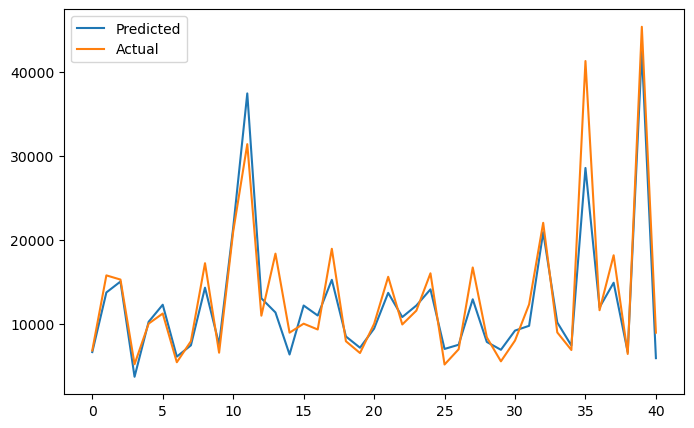

In [427]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Model Evaluation

In [446]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8734189235758101

Text(0, 0.5, 'y_pred_')

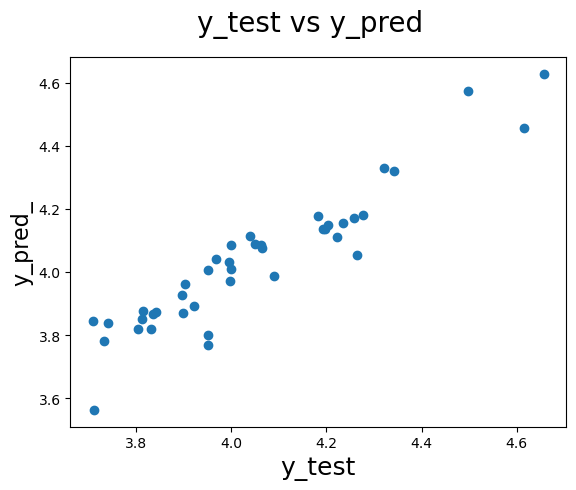

In [443]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_', fontsize=16)                          # Y-label

## Implementing Lasso regression

In [428]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [429]:
lasso.score(X_train, y_train)

0.5843799787551647

In [430]:
y_pred_l = lasso.predict(X_test)

In [431]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 41045022.19389809
RMSE : 6406.638915523341
R2 : 0.4698146084824003
Adjusted R2 :  -0.3254634787939992


In [432]:
from sklearn.model_selection import GridSearchCV

In [433]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [434]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.005057074346555318


In [435]:
y_pred_lasso = lasso_regressor.predict(X_test)

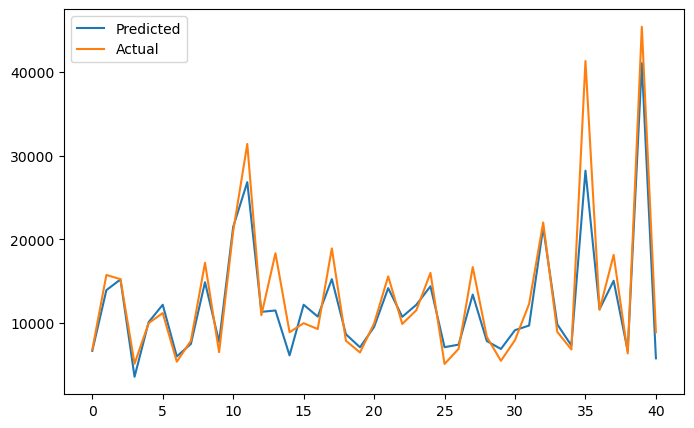

In [436]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Model Evaluation

In [444]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lasso)

0.8766579824422486

Text(0, 0.5, 'y_pred_lasso')

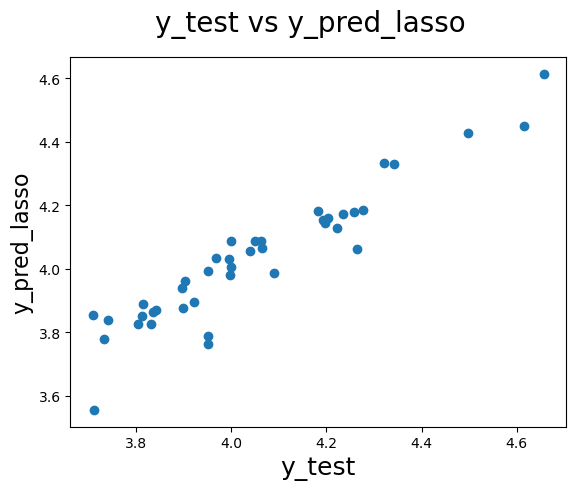

In [445]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_lasso)
fig.suptitle('y_test vs y_pred_lasso', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_lasso', fontsize=16)                          # Y-label

In [440]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.08255575560252282
Model r2_score: 0.8734189235758101


r2_score on the test data is very close to the trained Adj. R-Squared value of the model. we have a significantly high r2_score and a low RMSE of 0.067.